# Описание проекта 
## Описание данных

Датасет содержит информацию о покупателях магазина и был взят с платформы Kaggle: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

В данных представлены следующие переменные:

ID — уникальный идентификатор клиента

Year_Birth — год рождения

Education — уровень образования

Marital_Status — семейное положение

Income — годовой доход семьи

Kidhome — количество детей в семье

Teenhome — количество подростков в семье

Dt_Customer — дата регистрации клиента

Recency — количество дней с момента последней покупки

Complain — наличие жалоб за последние 2 года (1 — жаловался, 0 — нет)

MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds — суммы, потраченные клиентом за последние 2 года по категориям товаров

NumDealsPurchases — количество покупок со скидкой

AcceptedCmp1–5 — участие клиента в 5 предыдущих маркетинговых кампаниях (1 — участвовал, 0 — нет)

Response — участие в последней маркетинговой кампании (целевой показатель)

NumWebPurchases, NumCatalogPurchases, NumStorePurchases — покупки через сайт, каталог и в магазине

NumWebVisitsMonth — количество посещений сайта за последний месяц



## Цель проекта

Предсказать, будет ли клиент участвовать в маркетинговой кампании

Определить, какие характеристики клиентов увеличивают их склонность  участвовать в маркетинговой кампании

## Гипотезы

- H1: Чем раньше клиент зарегистрировался на сайте магазина, тем большее его склонность попасть в категорию участников маркетинговой кампании
- H2: Если человек участвовал в прошлых маркетинговых кампаниях, склонность участвовать в следующей больше
- H3: Чем больше человек тратит на покупки по категориям, тем он более склонен участвовать в маркетинговых кампаниях
- H4: С ростом количества дней с момента последней покупки склонность попасть в категорию участников сокращается
- H5: Люди, совершающие большее число покупок через сайт, каталог и в магазине, а также регулярно посещяющие сайт магазина, более склонны участвовать в маркетинговых кампаниях
- H6: Чем меньше детей в семье, тем больше склонность участвовать в маркетинговой кампании
- H7: Чем меньше подростков в семье, тем больше склонность частвовать в маркетинговой кампании
- H8: С ростом доходов склонность попасть в категорию участников кампании растет


## Методы

Построены и протестированы модели:

- Базовая (нулевая) модель
- KNN
- Логистическая регрессия
- Случайный лес
- CatBoost

## Основные результаты

Наилучшие результаты показала **логистическая регрессия** с параметрами C=1, penalty='l1', solver='liblinear'.
Метрика F1 для целевого класса (участников кампании) достигла **0.57**, что является неплохим результатом для несбалансированных классов.

Основные выводы о взаимосвязях:

- Клиенты, которые дольше ими являются, чаще совершают покупки и посещают сайт, больше тратят на некоторые категории и участвовали в прошлых маркетинговых кампаниях, чаще участвуют в новых.

- Демографические факторы (напрмер, доход, количество маленьких детей) слабо связаны с участием в маркетинговой кампании

Самые важные признаки, позволяющие определить учатсвует ли клиент в маркетинговых кампаняих: 

- дата последней покупки
- дата регистрации на сайте
- количество покупок в магазине
- траты на покупку мяса

## Предобработка данных

Загрузим необходимые библиотеки:

In [94]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from datetime import datetime
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

from sklearn.cluster import KMeans
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('seaborn')

In [95]:
#загружаем данные
df = pd.read_csv("marketing_campaign (1).csv", sep = "\t")

Рассмотрим структуру датасета

In [96]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [97]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


В данных о доходах есть пропуски, заполним их средним значением:

In [98]:
print(df.isna().sum())
mean_income = round(df["Income"].mean())
mean_income
df["Income"].fillna(mean_income, inplace=True)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


В столбце Marital_Status есть две три малочисленные категории (Absurd, YOLO и Alone), мы исключим категории Absurd, YOLO из анализа, а категорию Alone мы перекодируем как Single, так как они содержательно не отличаются.

In [99]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [100]:
df = df.drop(df[df['Marital_Status'].isin(['Absurd', 'YOLO'])].index)

In [101]:
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')

In [102]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

Уберем нереалистичные года рождения

In [103]:
df['Year_Birth'].value_counts().sort_index(ascending=False)

1996     2
1995     5
1994     3
1993     4
1992    13
1991    15
1990    18
1989    30
1988    29
1987    27
1986    42
1985    32
1984    38
1983    42
1982    45
1981    39
1980    39
1979    53
1978    77
1977    52
1976    89
1975    83
1974    69
1973    72
1972    79
1971    87
1970    77
1969    71
1968    51
1967    44
1966    50
1965    74
1964    42
1963    45
1962    44
1961    36
1960    49
1959    51
1958    53
1957    42
1956    55
1955    49
1954    50
1953    35
1952    52
1951    43
1950    29
1949    30
1948    21
1947    16
1946    16
1945     8
1944     7
1943     7
1941     1
1940     1
1900     1
1899     1
1893     1
Name: Year_Birth, dtype: int64

In [104]:
df = df.drop(df[df['Year_Birth'] <= 1940].index)

Преобразуем даты рождения в возраст (предположим, что данные были собраны в 2014 году)

In [105]:
df['Age'] = 2014 - df['Year_Birth']

In [106]:
df['Age'].value_counts().sort_index()

18     2
19     5
20     3
21     4
22    13
23    15
24    18
25    30
26    29
27    27
28    42
29    32
30    38
31    42
32    45
33    39
34    39
35    53
36    77
37    52
38    89
39    83
40    69
41    72
42    79
43    87
44    77
45    71
46    51
47    44
48    50
49    74
50    42
51    45
52    44
53    36
54    49
55    51
56    53
57    42
58    55
59    49
60    50
61    35
62    52
63    43
64    29
65    30
66    21
67    16
68    16
69     8
70     7
71     7
73     1
Name: Age, dtype: int64

Замечаем, что в данных присутствуют нетипичные значения доходов. Удаляем их

In [107]:
df[df["Income"]>(df["Income"].mean()*3)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,3,11,0,41
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,0,0,0,0,0,0,3,11,0,38
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,3,11,0,32
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,...,0,0,0,0,0,0,3,11,0,43
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,0,0,0,0,0,0,3,11,0,37
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,3,11,0,65
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,0,0,0,0,0,0,3,11,0,37


In [108]:
df[df["Income"]>150000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,3,11,0,41
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,0,0,0,0,0,0,3,11,0,38
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,0,0,0,3,11,0,39
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,3,11,0,32
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,...,0,0,0,0,0,0,3,11,0,43
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,0,0,0,0,0,0,3,11,0,37
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,3,11,0,65
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,0,0,0,0,0,0,3,11,0,37


In [109]:
df = df.drop(df[df['Income'] == 666666].index)

Удалим лишние столбцы (они не пригодятся для анализа)

In [110]:
df.drop(columns=['ID', "Z_CostContact", "Z_Revenue", "Year_Birth"], inplace=True)

# Exploratory data analysis

## Используемые модели


- knn классификация 
- логистическая регрессия
- случайный лес
- CatBoost



## Визуализация и описательные статистики

Разделим датафрейм на две части по значению в целевой переменной (Response): получим датасеты Response_1 и Response_0 

In [111]:
Response_1 = df[df['Response']  == 1]
Response_0 = df[df['Response']  == 0]

#### Целевая переменная: участие в последней кампании

Посчитаем количество участников и неучастников кампании

In [112]:
df['Response'].value_counts()

0    1899
1     332
Name: Response, dtype: int64

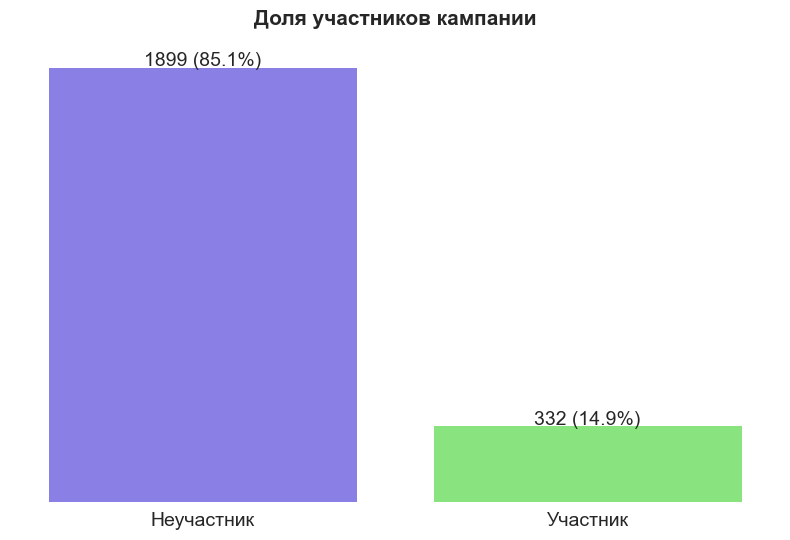

In [113]:
plt.rcParams['font.family'] = 'Arial' 

total = df['Response'].count()

ax = sns.countplot(data=df, x='Response', palette={0: '#7C6EF5', 1: '#7CF56E'})

plt.xticks(ticks=[0, 1], labels=['Неучастник', 'Участник'], fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.title('Доля участников кампании', fontsize=15, pad=15, fontweight='bold')

plt.grid(False)
sns.despine()
plt.gca().patch.set_facecolor('white')
plt.gca().yaxis.set_visible(False)

for p in ax.patches:
    value = int(p.get_height())
    percent = value / total * 100
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 5,
        f'{value} ({percent:.1f}%)',
        ha='center',
        fontsize=14,
        fontname='Arial'
    )

plt.tight_layout()
plt.show()


Видим, что классы неравномерные, участников кампании значительно меньше, чем неучастников

#### Возраст

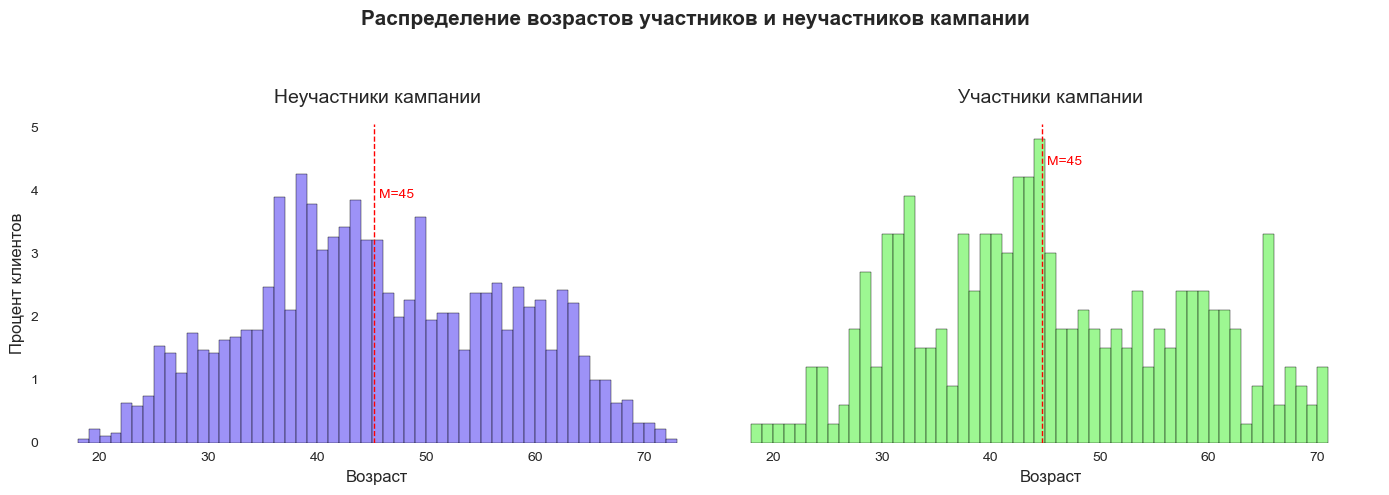

In [114]:
plt.rcParams['font.family'] = 'Arial'

age_1 = df[df['Response'] == 1]['Age']
age_0 = df[df['Response'] == 0]['Age']

mean_1, median_1 = age_1.mean(), age_1.median()
mean_0, median_0 = age_0.mean(), age_0.median()


fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

# График для нучастников кампании
sns.histplot(
    age_0,
    ax=axs[0],
    binwidth=1,
    color='#7C6EF5',
    kde=False,
    stat='percent'
)
axs[0].set_title('Неучастники кампании', fontsize=14, pad=15)
axs[0].set_xlabel('Возраст', fontsize=12)
axs[0].set_ylabel('Процент клиентов', fontsize=12)
axs[0].grid(False)
sns.despine(ax=axs[1], left=True)
axs[0].set_facecolor('white')

axs[0].axvline(mean_0, color='red', linestyle='--', linewidth=1)
axs[0].text(mean_0 + 0.5, axs[0].get_ylim()[1] * 0.90,
            f'M={mean_0:.0f}', ha='left', va='top', fontsize=10, color='red')

# График для участников кампании
sns.histplot(
    age_1,
    ax=axs[1],
    binwidth=1,
    color='#7CF56E',
    kde=False,
    stat='percent'
)
axs[1].set_title('Участники кампании', fontsize=14, pad=15)
axs[1].set_xlabel('Возраст', fontsize=12)
axs[1].set_ylabel('')
axs[1].grid(False)
sns.despine(ax=axs[1], left=True)
axs[1].set_facecolor('white')


axs[1].axvline(mean_1, color='red', linestyle='--', linewidth=1)
axs[1].text(mean_1 + 0.5, axs[1].get_ylim()[1] * 0.90,
            f'M={mean_1:.0f}', ha='left', va='top', fontsize=10, color='red')


plt.suptitle('Распределение возрастов участников и неучастников кампании', fontsize=15, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


In [115]:
age_1 = df[df["Response"] == 1]["Age"]
age_0 = df[df["Response"] == 0]["Age"]

desc_1 = age_1.describe()
desc_0 = age_0.describe()

age_stats = pd.DataFrame({
    "Неучастники": desc_0,
    "Участники": desc_1
}).round(1)


age_stats.index = [
    "Количество", "Среднее", "Стандартное отклонение",
    "Минимум", "25-й перцентиль", "Медиана",
    "75-й перцентиль", "Максимум"
]

# Вычисляем p-value
t_stat, p_value = ttest_ind(age_1, age_0, equal_var=False)
significance = "различия есть" if p_value < 0.05 else "различий нет"
significance_text = f"p = {p_value:.2f}, {significance}"

age_stats["Различия средних"] = ""
age_stats.loc["Среднее", "Различия средних"] = significance_text

# Выводим таблицу
print(age_stats)


                        Неучастники  Участники        Различия средних
Количество                   1899.0      332.0                        
Среднее                        45.2       44.7  p = 0.49, различий нет
Стандартное отклонение         11.6       12.4                        
Минимум                        18.0       18.0                        
25-й перцентиль                37.0       35.0                        
Медиана                        44.0       43.0                        
75-й перцентиль                55.0       55.0                        
Максимум                       73.0       71.0                        


Значимых различий в возрасте между участниками и неучастниками нет

#### Уровень дохода

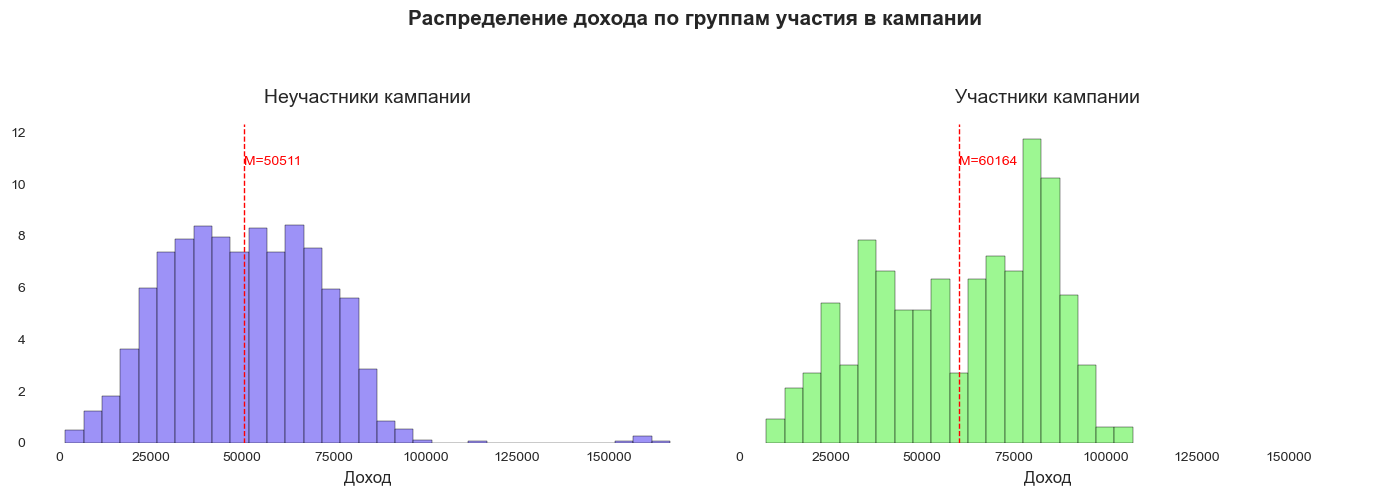

In [116]:
plt.rcParams['font.family'] = 'Arial'


income_1 = df[df['Response'] == 1]['Income']
income_0 = df[df['Response'] == 0]['Income']


mean_1 = income_1.mean()
median_1 = income_1.median()
mean_0 = income_0.mean()
median_0 = income_0.median()



fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

# Гистограмма для участников кампании 
sns.histplot(
    income_1,
    ax=axs[1],
    binwidth=5000,  
    color='#7CF56E',
    kde=False,
    stat='percent'
)
axs[1].set_title('Участники кампании', fontsize=14, pad=15)
axs[1].set_xlabel('Доход', fontsize=12)
axs[1].set_ylabel('Процент клиентов', fontsize=12)
axs[1].grid(False)
sns.despine(ax=axs[1], left=True)
axs[1].set_facecolor('white')



axs[1].axvline(mean_1, color='red', linestyle='--', linewidth=1)
axs[1].text(mean_1 + 0.5, axs[1].get_ylim()[1] * 0.90,
            f'M={mean_1:.0f}', ha='left', va='top', fontsize=10, color='red')

# Гистограмма для неучастников кампании
sns.histplot(
    income_0,
    ax=axs[0],
    binwidth=5000,  
    color= '#7C6EF5',
    kde=False,
    stat='percent'
)
axs[0].set_title('Неучастники кампании', fontsize=14, pad=15)
axs[0].set_xlabel('Доход', fontsize=12)
axs[0].set_ylabel('')
axs[0].grid(False)
sns.despine(ax=axs[0], left=True)
axs[0].set_facecolor('white')


axs[0].axvline(mean_0, color='red', linestyle='--', linewidth=1)
axs[0].text(mean_0 + 0.5, axs[0].get_ylim()[1] * 0.90,
            f'M={mean_0:.0f}', ha='left', va='top', fontsize=10, color='red')


plt.suptitle('Распределение дохода по группам участия в кампании', fontsize=15, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


In [117]:
inc_1 = df[df["Response"] == 1]["Income"]
inc_0 = df[df["Response"] == 0]["Income"]


desc_1 = inc_1.describe()
desc_0 = inc_0.describe()


inc_stats = pd.DataFrame({
    "Неучастники": desc_0,
    "Участники": desc_1
}).round(1)


inc_stats.index = [
    "Количество", "Среднее", "Стандартное отклонение",
    "Минимум", "25-й перцентиль", "Медиана",
    "75-й перцентиль", "Максимум"
]


t_stat, p_value = ttest_ind(inc_1, inc_0, equal_var=False)
significance = f"различия есть" if p_value < 0.05 else "различий нет"
significance_text = f"p = {p_value:.2f}, {significance}"

inc_stats["Различия средних"] = ""
inc_stats.loc["Среднее", "Различия средних"] = significance_text


print(inc_stats)


                        Неучастники  Участники         Различия средних
Количество                   1899.0      332.0                         
Среднее                     50510.6    60163.8  p = 0.00, различия есть
Стандартное отклонение      20775.0    23200.6                         
Минимум                      1730.0     7500.0                         
25-й перцентиль             34508.0    39743.2                         
Медиана                     50520.0    64044.0                         
75-й перцентиль             65907.0    80632.5                         
Максимум                   162397.0   105471.0                         


Уровень доходов у неучастников кампании меньше, чем у участников


#### Количество дней с момента последней покупки

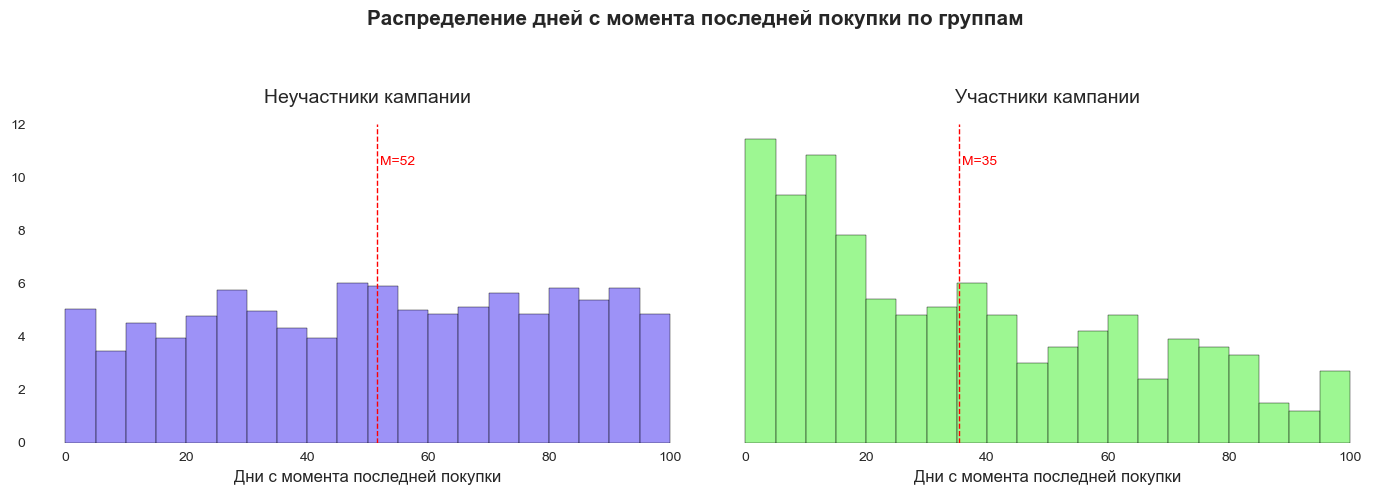

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'


recency_1 = df[df['Response'] == 1]['Recency']
recency_0 = df[df['Response'] == 0]['Recency']


mean_1 = recency_1.mean()
mean_0 = recency_0.mean()


fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

# Гистограмма для участников кампании
sns.histplot(
    recency_1,
    ax=axs[1],
    binwidth=5,
    color= '#7CF56E',
    kde=False,
    stat='percent'
)
axs[1].set_title('Участники кампании', fontsize=14, pad=15)
axs[1].set_xlabel('Дни с момента последней покупки', fontsize=12)
axs[1].set_ylabel('Процент клиентов', fontsize=12)
axs[1].grid(False)
sns.despine(ax=axs[1], left=True)
axs[1].set_facecolor('white')


axs[1].axvline(mean_1, color='red', linestyle='--', linewidth=1)
axs[1].text(mean_1 + 0.5, axs[1].get_ylim()[1] * 0.90,
            f'M={mean_1:.0f}', ha='left', va='top', fontsize=10, color='red')


# Гистограмма для неучастников кампании
sns.histplot(
    recency_0,
    ax=axs[0],
    binwidth=5,
    color='#7C6EF5',
    kde=False,
    stat='percent'
)
axs[0].set_title('Неучастники кампании', fontsize=14, pad=15)
axs[0].set_xlabel('Дни с момента последней покупки', fontsize=12)
axs[0].set_ylabel('')
axs[0].grid(False)
sns.despine(ax=axs[0], left=True)
axs[0].set_facecolor('white')


axs[0].axvline(mean_0, color='red', linestyle='--', linewidth=1)
axs[0].text(mean_0 + 0.5, axs[0].get_ylim()[1] * 0.90,
            f'M={mean_0:.0f}', ha='left', va='top', fontsize=10, color='red')

plt.suptitle('Распределение дней с момента последней покупки по группам', fontsize=15, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


In [119]:
res_1 = df[df["Response"] == 1]["Recency"]
res_0 = df[df["Response"] == 0]["Recency"]

mean_1 = res_1.mean()
mean_0 = res_0.mean()


desc_1 = res_1.describe()
desc_0 = res_0.describe()


res_stats = pd.DataFrame({
    "Неучастники": desc_0,
    "Участники": desc_1
}).round(1)


res_stats.index = [
    "Количество", "Среднее", "Стандартное отклонение",
    "Минимум", "25-й перцентиль", "Медиана",
    "75-й перцентиль", "Максимум"
]


t_stat, p_value = ttest_ind(res_1, res_0, equal_var=False)
significance = "различия есть" if p_value < 0.05 else "различйи нет"
significance_text = f"p = {p_value:.4f}, {significance}"

res_stats["Различия средних"] = ""
res_stats.loc["Среднее", "Различия средних"] = significance_text


print(res_stats)


                        Неучастники  Участники           Различия средних
Количество                   1899.0      332.0                           
Среднее                        51.5       35.4  p = 0.0000, различия есть
Стандартное отклонение         28.5       27.7                           
Минимум                         0.0        0.0                           
25-й перцентиль                27.0       11.0                           
Медиана                        52.0       30.0                           
75-й перцентиль                77.0       56.0                           
Максимум                       99.0       99.0                           


Участники кампании чаще осуществляют покупки в магазине по сравнению с неучастниками

#### Категории покупок

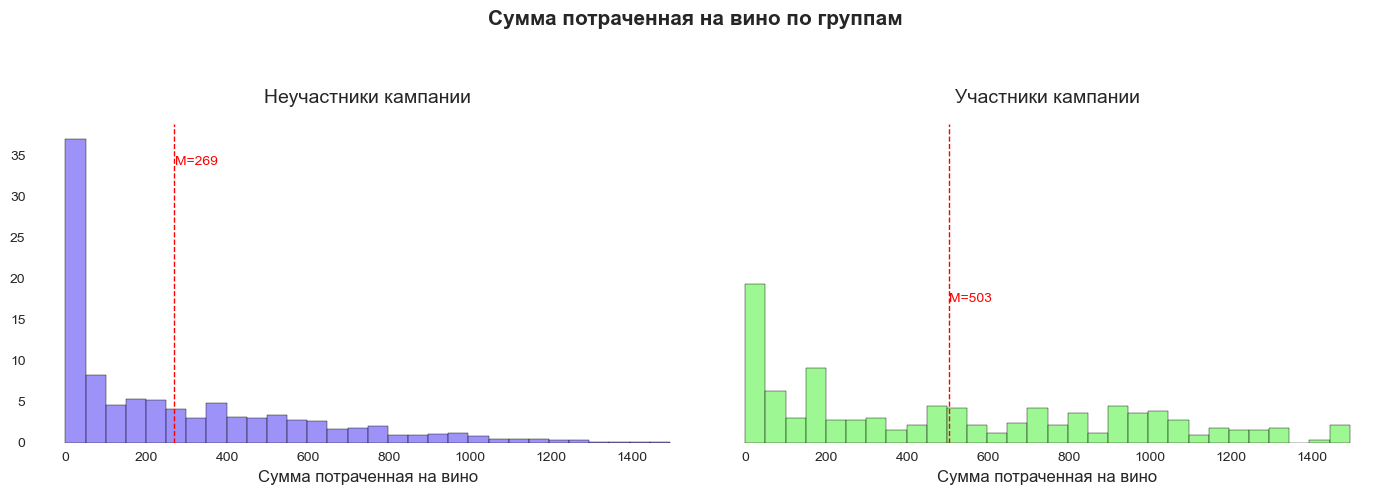

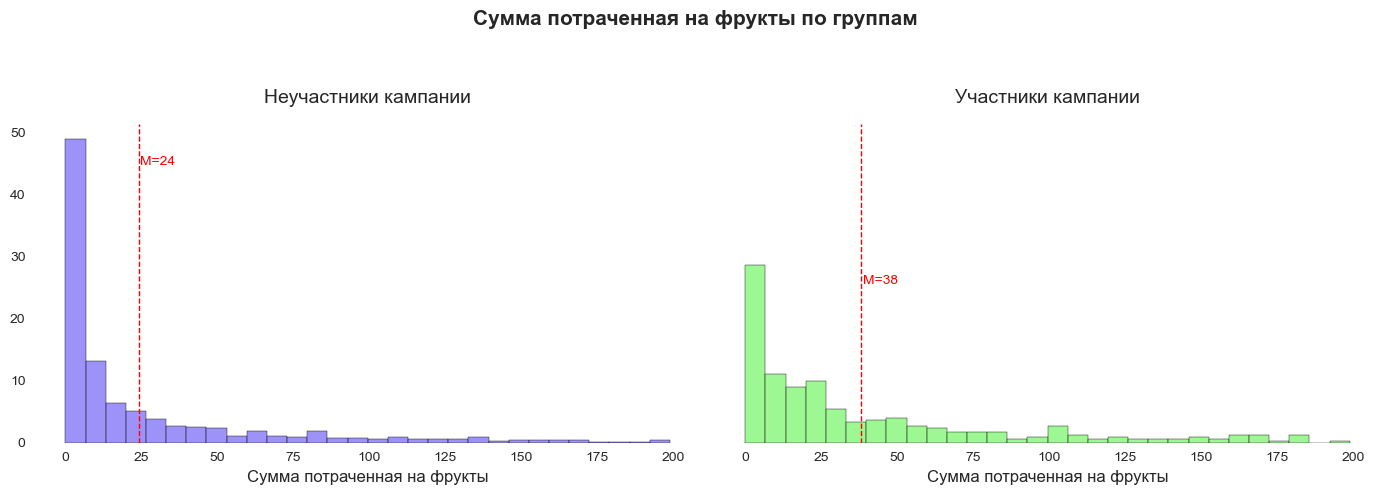

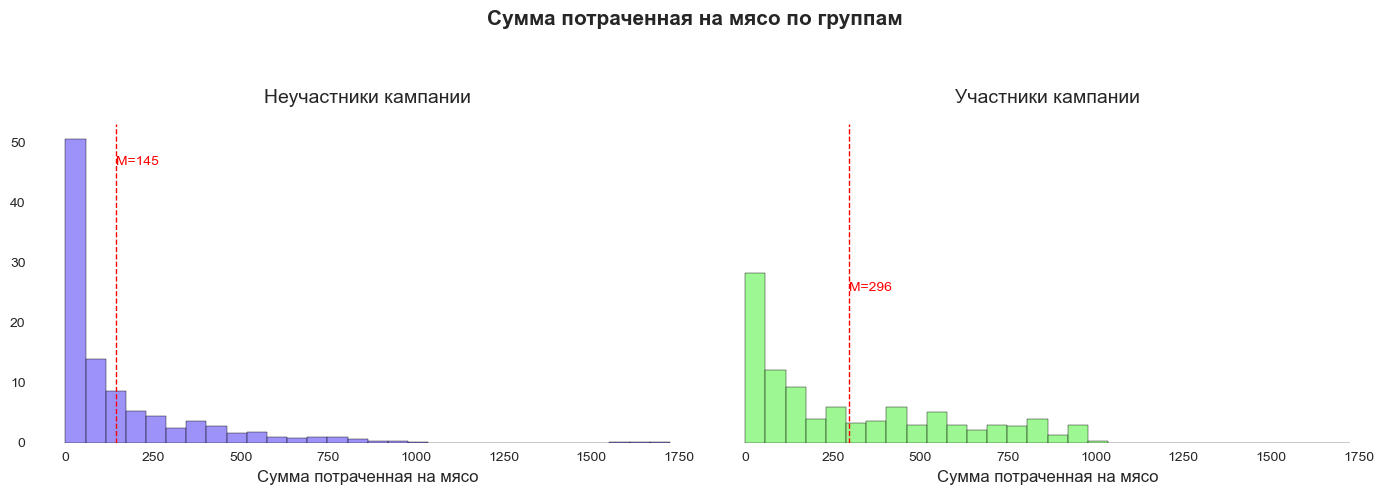

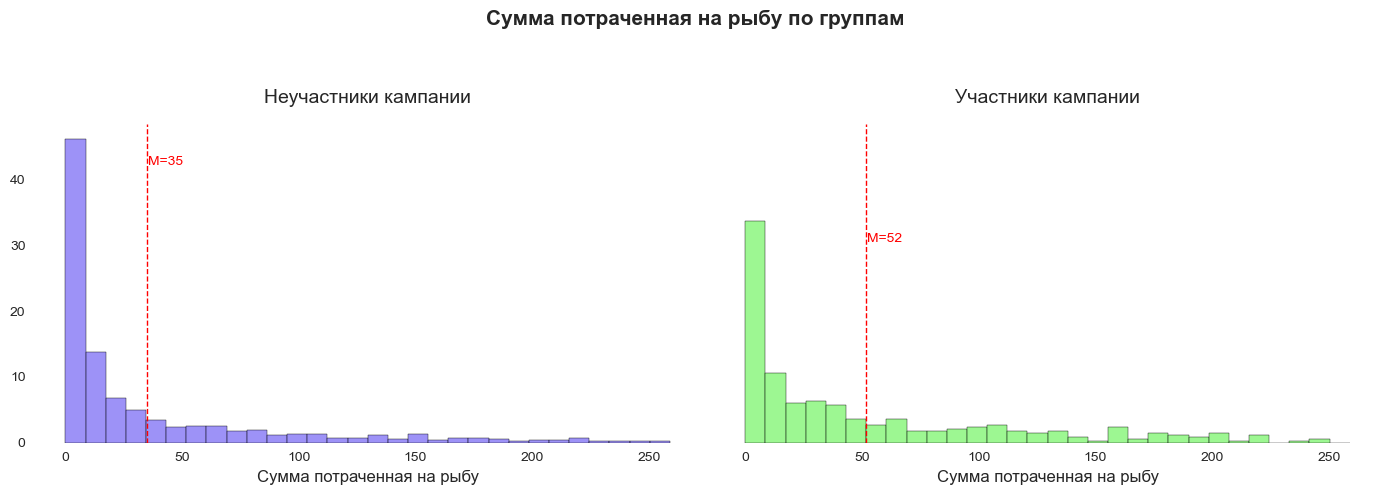

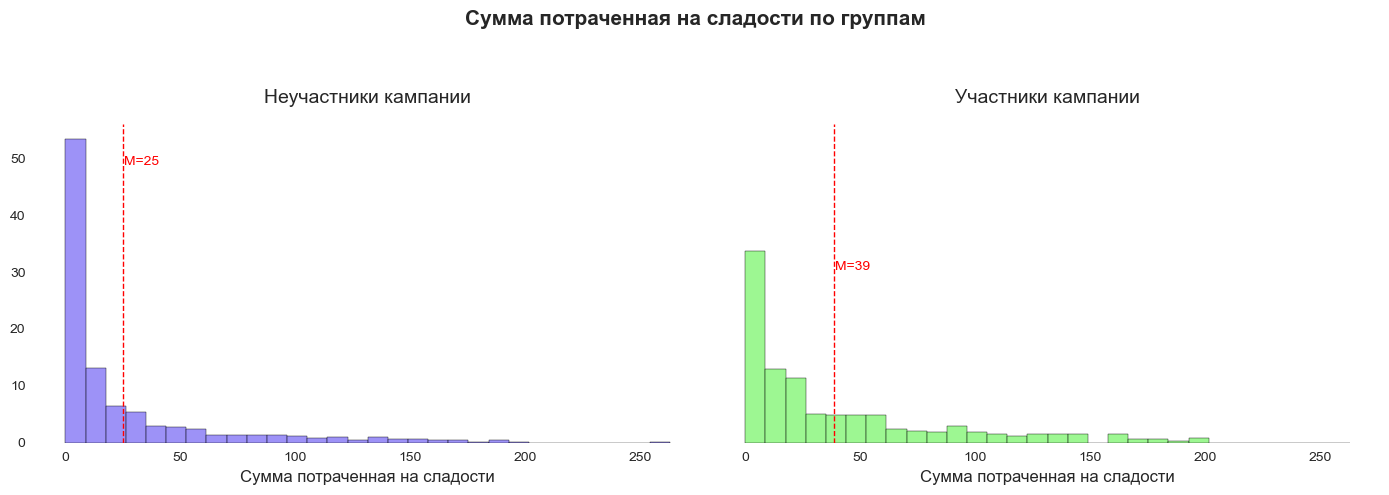

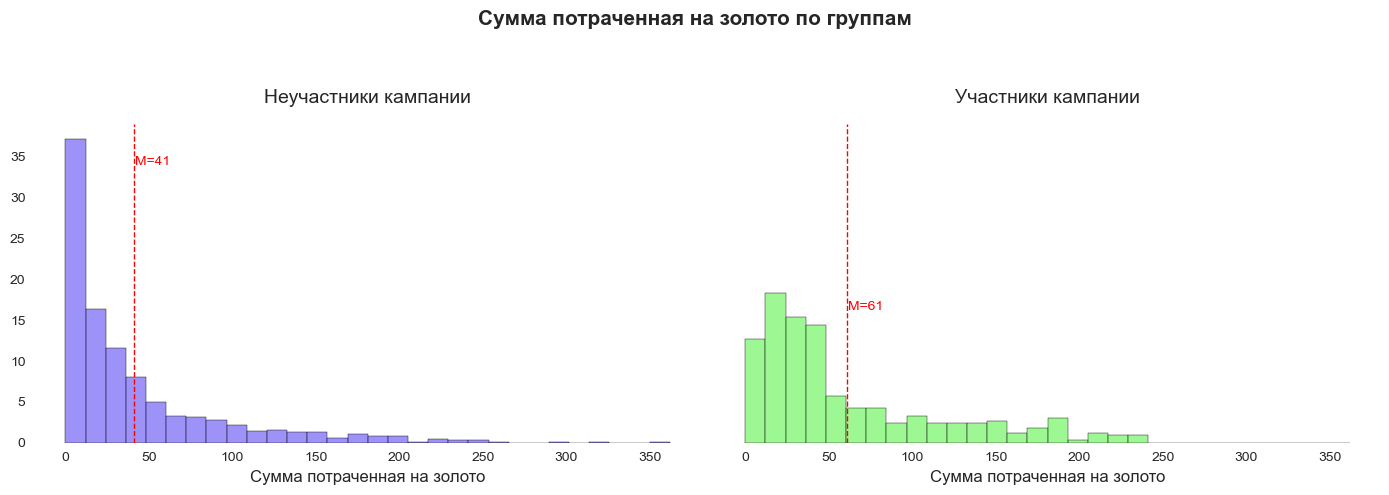

In [120]:
plt.rcParams['font.family'] = 'Arial'

features = [
    ('MntWines', 'Сумма потраченная на вино'),
    ('MntFruits', 'Сумма потраченная на фрукты'),
    ('MntMeatProducts', 'Сумма потраченная на мясо'),
    ('MntFishProducts', 'Сумма потраченная на рыбу'),
    ('MntSweetProducts', 'Сумма потраченная на сладости'),
    ('MntGoldProds', 'Сумма потраченная на золото')
]

for column, title in features:
    data_1 = df[df['Response'] == 1][column].dropna()
    data_0 = df[df['Response'] == 0][column].dropna()

    mean_1 = data_1.mean()
    mean_0 = data_0.mean()
    
    global_min = min(data_0.min(), data_1.min())
    global_max = max(data_0.max(), data_1.max())

    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

    # Гистограмма для участников кампании
    sns.histplot(
        data_1,
        ax=axs[1],
        kde=False,
        color='#7CF56E',
        bins=30,
        stat='percent',
        binrange=(global_min, global_max)
    )
    axs[1].set_title(f'Участники кампании', fontsize=14, pad=15)
    axs[1].set_xlabel(title, fontsize=12)
    axs[1].set_ylabel('Процент клиентов', fontsize=12)
    axs[1].grid(False)
    sns.despine(ax=axs[1], left=True)
    axs[1].set_facecolor('white')
    
    
    axs[1].axvline(mean_1, color='red', linestyle='--', linewidth=1)
    axs[1].text(mean_1 + 0.5, axs[0].get_ylim()[1] * 0.90,
            f'M={mean_1:.0f}', ha='left', va='top', fontsize=10, color='red')
    
    # Гистограмма для неучастников кампании
    sns.histplot(
        data_0,
        ax=axs[0],
        kde=False,
        color='#7C6EF5',
        bins=30,
        stat='percent',
        binrange=(global_min, global_max)
    )
    axs[0].set_title(f'Неучастники кампании', fontsize=14, pad=15)
    axs[0].set_xlabel(title, fontsize=12)
    axs[0].set_ylabel('')
    axs[0].grid(False)
    sns.despine(ax=axs[1], left=True)
    axs[0].set_facecolor('white')
    
    
    axs[0].axvline(mean_0, color='red', linestyle='--', linewidth=1)
    axs[0].text(mean_0 + 0.5, axs[0].get_ylim()[1] * 0.90,
            f'M={mean_0:.0f}', ha='left', va='top', fontsize=10, color='red')


    plt.suptitle(f'{title} по группам', fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()


In [121]:
variables = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

stat_index = [
    "Количество", "Среднее", "Стандартное отклонение",
    "Минимум", "25-й перцентиль", "Медиана",
    "75-й перцентиль", "Максимум"
]


for var in variables:
    
    data_1 = df[df["Response"] == 1][var].dropna()
    data_0 = df[df["Response"] == 0][var].dropna()
    
    desc_1 = data_1.describe()
    desc_0 = data_0.describe()

    stats_table = pd.DataFrame({
        "Неучастники": desc_0,
        "Участники": desc_1
    }).round(1)

    stats_table.index = stat_index
    stats_table["Различия средних"] = ""

    t_stat, p_value = ttest_ind(data_1, data_0, equal_var=False)
    significance = "различия есть" if p_value < 0.05 else "различий нет"
    stats_table.loc["Среднее", "Различия средних"] = f"p = {p_value:.2f}, {significance}"

    print(f"\n Показатель: {var}")
    print(stats_table)



 Показатель: MntWines
                        Неучастники  Участники         Различия средних
Количество                   1899.0      332.0                         
Среднее                       269.3      503.3  p = 0.00, различия есть
Стандартное отклонение        305.3      428.4                         
Минимум                         0.0        1.0                         
25-й перцентиль                22.0       94.8                         
Медиана                       152.0      448.0                         
75-й перцентиль               444.5      884.0                         
Максимум                     1493.0     1492.0                         

 Показатель: MntFruits
                        Неучастники  Участники         Различия средних
Количество                   1899.0      332.0                         
Среднее                        24.2       38.1  p = 0.00, различия есть
Стандартное отклонение         38.1       46.1                         
Минимум          

Распределения покупок разных видов товаров схожи. Участники кампании в среднем тратят больше чем неучастники

#### Способы покупок

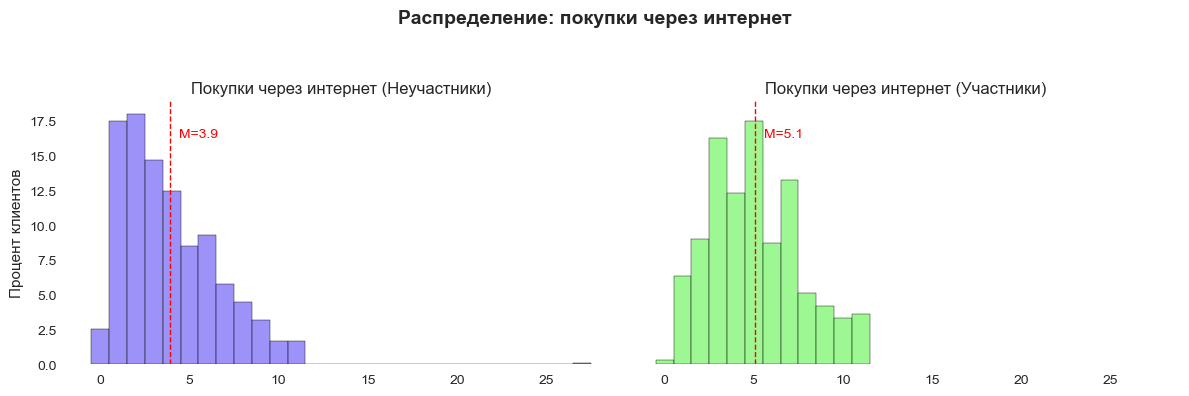

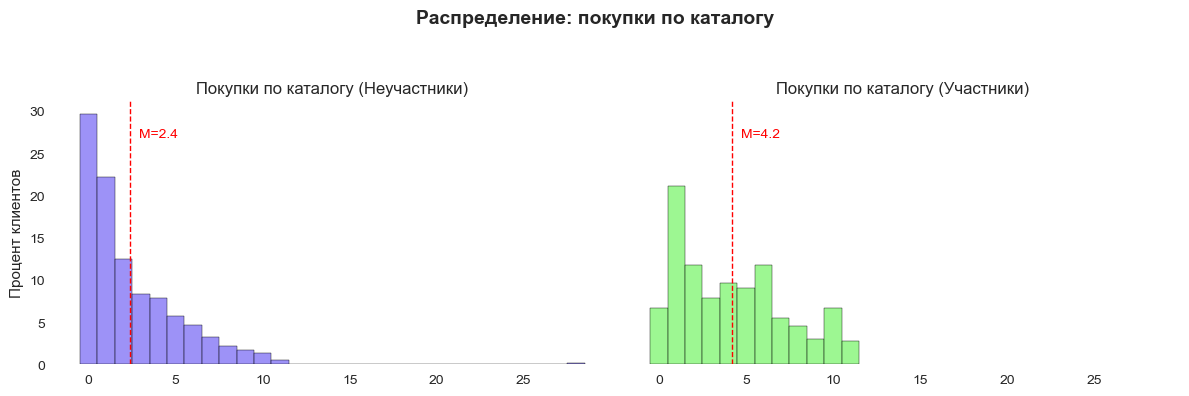

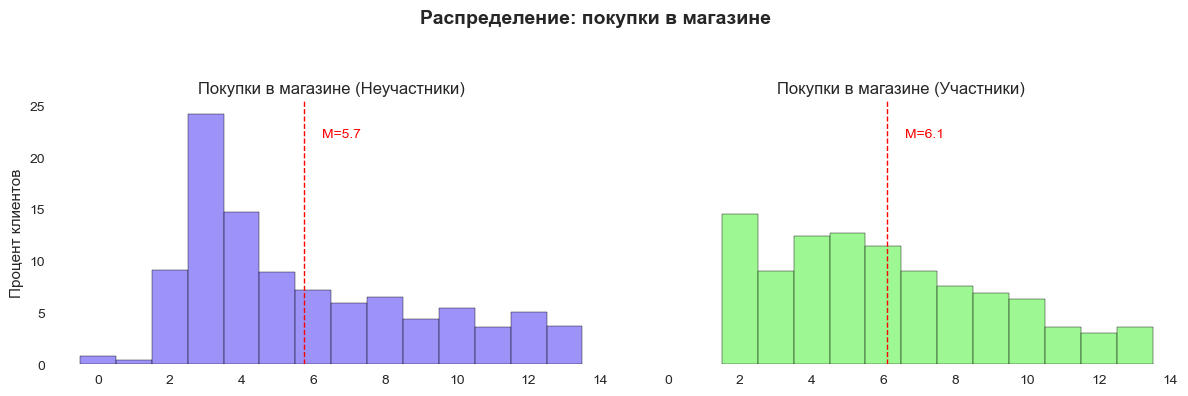

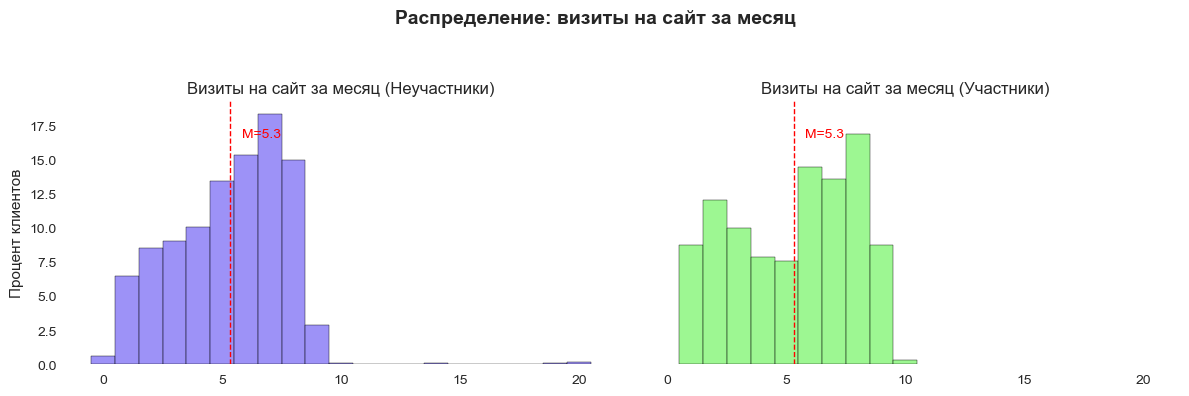

In [122]:

plt.rcParams['font.family'] = 'Arial'

features = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
titles = [
    'Покупки через интернет',
    'Покупки по каталогу',
    'Покупки в магазине',
    'Визиты на сайт за месяц'
]

colors = {'Неучастники': '#7C6EF5', 'Участники': '#7CF56E'}

for feature, title in zip(features, titles):
    data_0 = Response_0[feature].dropna()
    data_1 = Response_1[feature].dropna()
    
    mean_1 = data_1.mean()
    mean_0 = data_0.mean()
    

    fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

    # Гистограмма: Неучастники
    sns.histplot(
        data=data_0,
        binwidth=1,
        stat='percent',
        discrete=True,
        color='#7C6EF5',
        edgecolor='black',
        ax=axs[0]
    )
    axs[0].set_title(f'{title} (Неучастники)', fontsize=12)
    axs[0].set_ylabel('Процент клиентов')
    axs[0].set_xlabel('')
    axs[0].set_facecolor('white')
    axs[0].grid(False)
    sns.despine(ax=axs[0], left=True)
    
    axs[0].axvline(mean_0, color='red', linestyle='--', linewidth=1)
    axs[0].text(mean_0 + 0.5, axs[0].get_ylim()[1] * 0.90,
            f'M={mean_0:.1f}', ha='left', va='top', fontsize=10, color='red')

    # Гистограмма: Участники
    sns.histplot(
        data=data_1,
        binwidth=1,
        stat='percent',
        discrete=True,
        color='#7CF56E',
        edgecolor='black',
        ax=axs[1]
    )
    axs[1].set_title(f'{title} (Участники)', fontsize=12)
    axs[1].set_ylabel('')
    axs[1].set_xlabel('')
    axs[1].set_facecolor('white')
    axs[1].grid(False)
    sns.despine(ax=axs[1], left=True)
    
    axs[1].axvline(mean_1, color='red', linestyle='--', linewidth=1)
    axs[1].text(mean_1 + 0.5, axs[1].get_ylim()[1] * 0.90,
            f'M={mean_1:.1f}', ha='left', va='top', fontsize=10, color='red')

  
    plt.suptitle(f'Распределение: {title.lower()}', fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()


In [123]:

variables = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

stat_index = [
    "Количество", "Среднее", "Стандартное отклонение",
    "Минимум", "25-й перцентиль", "Медиана",
    "75-й перцентиль", "Максимум"
]


for var in variables:
    data_1 = df[df["Response"] == 1][var].dropna()
    data_0 = df[df["Response"] == 0][var].dropna()
    
    desc_1 = data_1.describe()
    desc_0 = data_0.describe()

    stats_table = pd.DataFrame({
        "Неучастники": desc_0,
        "Участники": desc_1
    }).round(1)

    stats_table.index = stat_index
    stats_table["Различия средних"] = ""

    t_stat, p_value = ttest_ind(data_1, data_0, equal_var=False)
    significance = "различия есть" if p_value < 0.05 else "различий нет"
    stats_table.loc["Среднее", "Различия средних"] = f"p = {p_value:.2f}, {significance}"

    print(f"\n Показатель: {var}")
    print(stats_table)



 Показатель: NumWebPurchases
                        Неучастники  Участники         Различия средних
Количество                   1899.0      332.0                         
Среднее                         3.9        5.1  p = 0.00, различия есть
Стандартное отклонение          2.8        2.6                         
Минимум                         0.0        0.0                         
25-й перцентиль                 2.0        3.0                         
Медиана                         3.0        5.0                         
75-й перцентиль                 6.0        7.0                         
Максимум                       27.0       11.0                         

 Показатель: NumCatalogPurchases
                        Неучастники  Участники         Различия средних
Количество                   1899.0      332.0                         
Среднее                         2.4        4.2  p = 0.00, различия есть
Стандартное отклонение          2.8        3.1                         


Покупки через интернет и по каталогу чаще совершаются учасниками кампании по стравнению с неучастниками

#### Число покупок со скидкой

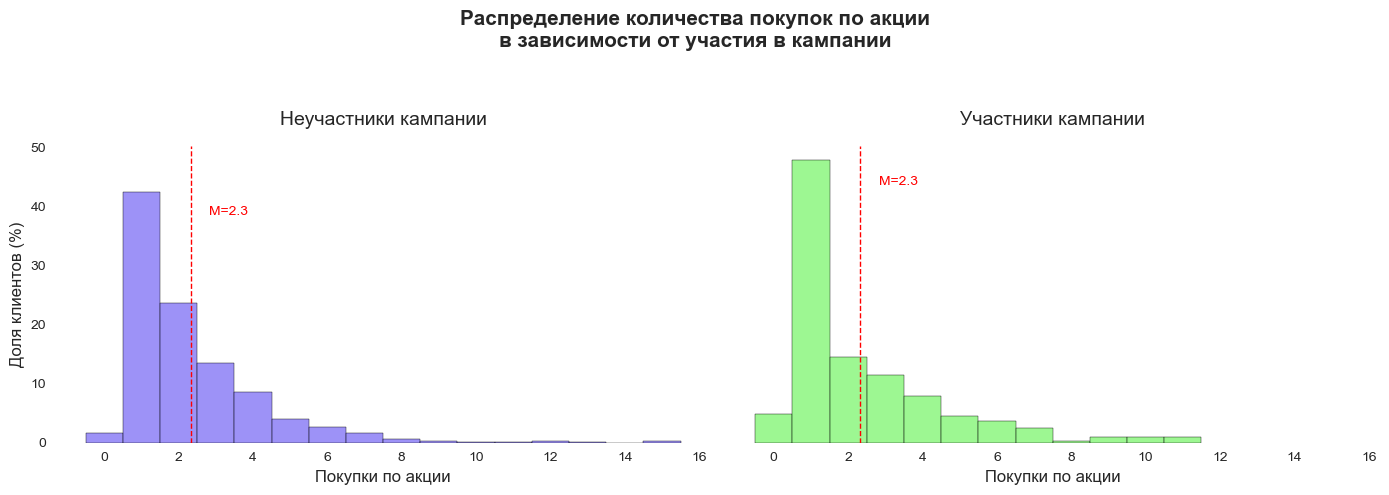

In [124]:

plt.rcParams['font.family'] = 'Arial'


data_1 = df[df['Response'] == 1]['NumDealsPurchases'].dropna()
data_0 = df[df['Response'] == 0]['NumDealsPurchases'].dropna()

mean_1 = data_1.mean()
mean_0 = data_0.mean()

fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

# Гистограмма: Неучастники кампании
sns.histplot(
    data=data_0,
    binwidth=1,
    stat='percent',
    discrete=True,
    color='#7C6EF5',
    edgecolor='black',
    ax=axs[0]
)
axs[0].set_title('Неучастники кампании', fontsize=14, pad=15)
axs[0].set_xlabel('Покупки по акции', fontsize=12)
axs[0].set_ylabel('Доля клиентов (%)', fontsize=12)
axs[0].set_facecolor('white')
axs[0].grid(False)
sns.despine(ax=axs[0], left=True)

axs[0].axvline(mean_0, color='red', linestyle='--', linewidth=1)
axs[0].text(mean_0 + 0.5, axs[0].get_ylim()[1] * 0.90,
            f'M={mean_0:.1f}', ha='left', va='top', fontsize=10, color='red')
    
# Гистограмма: Участники кампании
sns.histplot(
    data=data_1,
    binwidth=1,
    stat='percent',
    discrete=True,
    color='#7CF56E',
    edgecolor='black',
    ax=axs[1]
)
axs[1].set_title('Участники кампании', fontsize=14, pad=15)
axs[1].set_xlabel('Покупки по акции', fontsize=12)
axs[1].set_ylabel('')
axs[1].set_facecolor('white')
axs[1].grid(False)
sns.despine(ax=axs[1], left=True)

axs[1].axvline(mean_1, color='red', linestyle='--', linewidth=1)
axs[1].text(mean_1 + 0.5, axs[1].get_ylim()[1] * 0.90,
        f'M={mean_1:.1f}', ha='left', va='top', fontsize=10, color='red')

# Общий заголовок
plt.suptitle('Распределение количества покупок по акции\nв зависимости от участия в кампании',
             fontsize=15, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


In [125]:

res_1 = df[df["Response"] == 1]["NumDealsPurchases"]
res_0 = df[df["Response"] == 0]["NumDealsPurchases"]

mean_1 = res_1.mean()
mean_0 = res_0.mean()


desc_1 = res_1.describe()
desc_0 = res_0.describe()


res_stats = pd.DataFrame({
    "Неучастники": desc_0,
    "Участники": desc_1
}).round(1)


res_stats.index = [
    "Количество", "Среднее", "Стандартное отклонение",
    "Минимум", "25-й перцентиль", "Медиана",
    "75-й перцентиль", "Максимум"
]


t_stat, p_value = ttest_ind(res_1, res_0, equal_var=False)
significance = "различия есть" if p_value < 0.05 else "различий нет"
significance_text = f"p = {p_value:.4f}, {significance}"

res_stats["Различия средних"] = ""
res_stats.loc["Среднее", "Различия средних"] = significance_text


print(res_stats)


                        Неучастники  Участники          Различия средних
Количество                   1899.0      332.0                          
Среднее                         2.3        2.3  p = 0.9485, различий нет
Стандартное отклонение          1.9        2.1                          
Минимум                         0.0        0.0                          
25-й перцентиль                 1.0        1.0                          
Медиана                         2.0        1.0                          
75-й перцентиль                 3.0        3.0                          
Максимум                       15.0       11.0                          


Распределение покупок со скидкой похожи для двух групп, средние равны

#### Дата регистрации покупателя

In [126]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

reference_date = df['Dt_Customer'].max()

df['Months_Since_Registration'] = (
    (reference_date.year - df['Dt_Customer'].dt.year) * 12 +
    (reference_date.month - df['Dt_Customer'].dt.month)
)

print(df[['Dt_Customer', 'Months_Since_Registration']].head())


  Dt_Customer  Months_Since_Registration
0  2012-09-04                         21
1  2014-03-08                          3
2  2013-08-21                         10
3  2014-02-10                          4
4  2014-01-19                          5


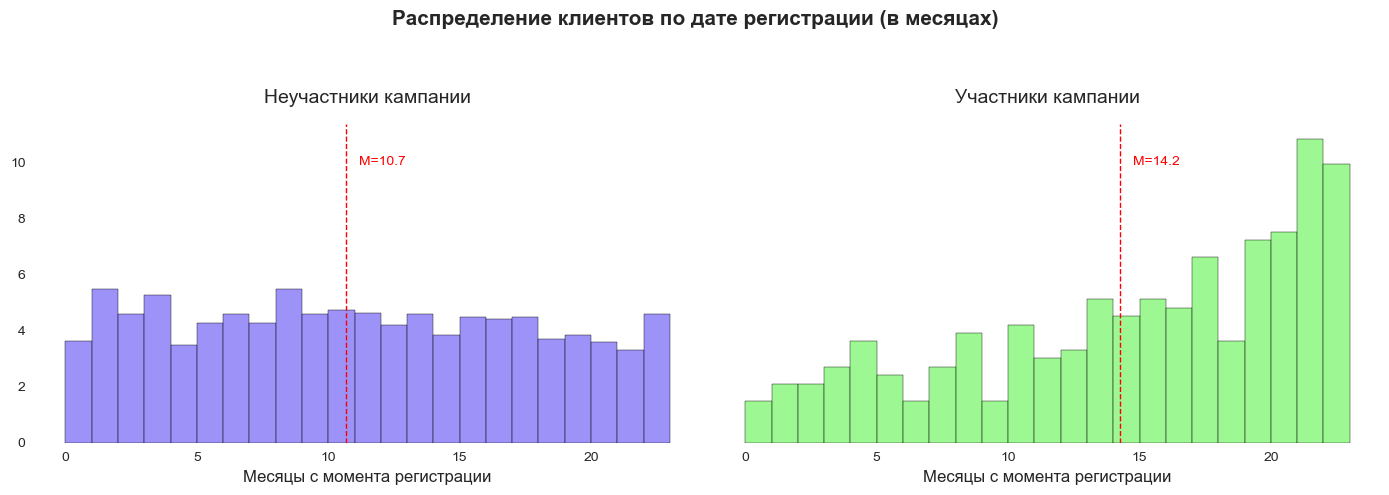

In [127]:
plt.rcParams['font.family'] = 'Arial'


data_1 = df[df['Response'] == 1]['Months_Since_Registration']
data_0 = df[df['Response'] == 0]['Months_Since_Registration']

mean_1 = data_1.mean()
mean_0 = data_0.mean()


fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Гистограмма для участников кампании
sns.histplot(
    data_1,
    ax=axs[1],
    binwidth=1,
    color='#7CF56E',
    stat='percent',
    edgecolor='black'
)
axs[1].set_title('Участники кампании', fontsize=14, pad=15)
axs[1].set_xlabel('Месяцы с момента регистрации', fontsize=12)
axs[1].set_ylabel('Процент клиентов', fontsize=12)
axs[1].grid(False)
sns.despine(ax=axs[1], left=True)
axs[1].set_facecolor('white')

axs[1].axvline(mean_1, color='red', linestyle='--', linewidth=1)
axs[1].text(mean_1 + 0.5, axs[1].get_ylim()[1] * 0.90,
            f'M={mean_1:.1f}', ha='left', va='top', fontsize=10, color='red')

# Гистограмма для неучастников кампании
sns.histplot(
    data_0,
    ax=axs[0],
    binwidth=1,
    color='#7C6EF5',
    stat='percent',
    edgecolor='black'
)
axs[0].set_title('Неучастники кампании', fontsize=14, pad=15)
axs[0].set_xlabel('Месяцы с момента регистрации', fontsize=12)
axs[0].set_ylabel('')
axs[0].grid(False)
sns.despine(ax=axs[0], left=True)
axs[0].set_facecolor('white')

axs[0].axvline(mean_0, color='red', linestyle='--', linewidth=1)
axs[0].text(mean_0 + 0.5, axs[1].get_ylim()[1] * 0.90,
        f'M={mean_0:.1f}', ha='left', va='top', fontsize=10, color='red')

# Общий заголовок
plt.suptitle('Распределение клиентов по дате регистрации (в месяцах)', fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


In [128]:

res_1 = df[df["Response"] == 1]["Months_Since_Registration"]
res_0 = df[df["Response"] == 0]["Months_Since_Registration"]

mean_1 = res_1.mean()
mean_0 = res_0.mean()


desc_1 = res_1.describe()
desc_0 = res_0.describe()


res_stats = pd.DataFrame({
    "Неучастники": desc_0,
    "Участники": desc_1
}).round(1)


res_stats.index = [
    "Количество", "Среднее", "Стандартное отклонение",
    "Минимум", "25-й перцентиль", "Медиана",
    "75-й перцентиль", "Максимум"
]


t_stat, p_value = ttest_ind(res_1, res_0, equal_var=False)
significance = "различия есть" if p_value < 0.05 else "различий нет"
significance_text = f"p = {p_value:.4f}, {significance}"

res_stats["Различия средних"] = ""
res_stats.loc["Среднее", "Различия средних"] = significance_text


print(res_stats)


                        Неучастники  Участники           Различия средних
Количество                   1899.0      332.0                           
Среднее                        10.7       14.2  p = 0.0000, различия есть
Стандартное отклонение          6.5        6.4                           
Минимум                         0.0        0.0                           
25-й перцентиль                 5.0       10.0                           
Медиана                        10.0       16.0                           
75-й перцентиль                16.0       20.0                           
Максимум                       23.0       23.0                           


Для участников кампании пик распределения находится с лева - они преимущественно регистрировались давно, а для неучастников распределение напоминает равномерное

#### Количество детей и подростков

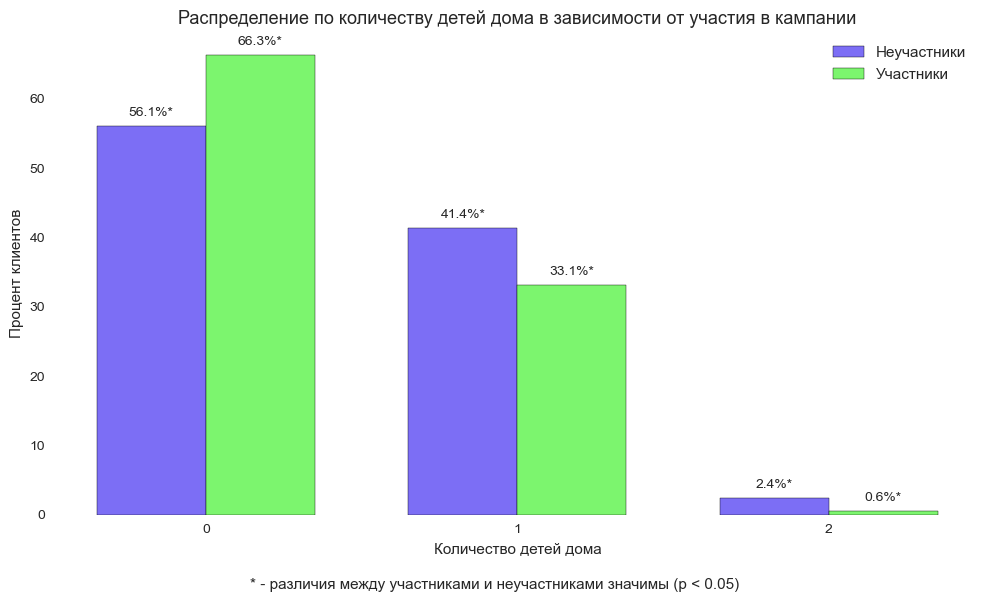


Общий χ²-тест по распределению Kidhome и Response: p-value = 0.00 — значимо

         Доля неучастников (%)  Доля участников (%)  p-value Значимость
Kidhome                                                                
0                         56.1                 66.3   0.0006    значимо
1                         41.4                 33.1   0.0044    значимо
2                          2.4                  0.6   0.0350    значимо


In [129]:
grouped = (
    df
    .groupby(['Kidhome', 'Response'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)


chi2, p_all, _, _ = chi2_contingency(grouped)


total_non = grouped[0].sum()
total_yes = grouped[1].sum()


rows = []

for kidhome_val in grouped.index:
    count_non = grouped.loc[kidhome_val, 0]
    count_yes = grouped.loc[kidhome_val, 1]

    prop_non = count_non / total_non
    prop_yes = count_yes / total_yes

    count = [count_yes, count_non]
    nobs = [total_yes, total_non]
    z_stat, p_val = proportions_ztest(count, nobs)

    rows.append({
        'Kidhome': kidhome_val,
        'Доля неучастников (%)': round(prop_non * 100, 1),
        'Доля участников (%)': round(prop_yes * 100, 1),
        'p-value': round(p_val, 4),
        'Значимость': 'значимо' if p_val < 0.05 else 'не значимо',
        'signif': p_val < 0.05
    })


result_df = pd.DataFrame(rows).set_index('Kidhome')


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(result_df))

palette = {0: '#7C6EF5', 1: '#7CF56E'}


ax.bar([pos - bar_width/2 for pos in x], result_df['Доля неучастников (%)'], width=bar_width, color=palette[0], edgecolor='black', label='Неучастники')
ax.bar([pos + bar_width/2 for pos in x], result_df['Доля участников (%)'], width=bar_width, color=palette[1], edgecolor='black', label='Участники')


ax.set_xticks(x)
ax.set_xticklabels(result_df.index)
ax.set_ylabel('Процент клиентов')
ax.set_xlabel('Количество детей дома')
ax.set_title('Распределение по количеству детей дома в зависимости от участия в кампании', fontsize=13)
ax.legend(fontsize=11)
ax.set_facecolor('white')
sns.despine(left=True)
plt.grid(False)


for i, kidhome_val in enumerate(result_df.index):
    height_non = result_df.loc[kidhome_val, 'Доля неучастников (%)']
    height_yes = result_df.loc[kidhome_val, 'Доля участников (%)']
    signif = result_df.loc[kidhome_val, 'signif']
    star = '*' if signif else ''

    ax.text(i - bar_width/2, height_non + 1, f'{height_non:.1f}%{star}', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width/2, height_yes + 1, f'{height_yes:.1f}%{star}', ha='center', va='bottom', fontsize=10)


plt.figtext(0.5, 0.01, '* - различия между участниками и неучастниками значимы (p < 0.05)', ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()


print(f"\nОбщий χ²-тест по распределению Kidhome и Response: p-value = {p_all:.2f} — {'значимо' if p_all < 0.05 else 'незначимо'}\n")
print(result_df.drop(columns='signif'))


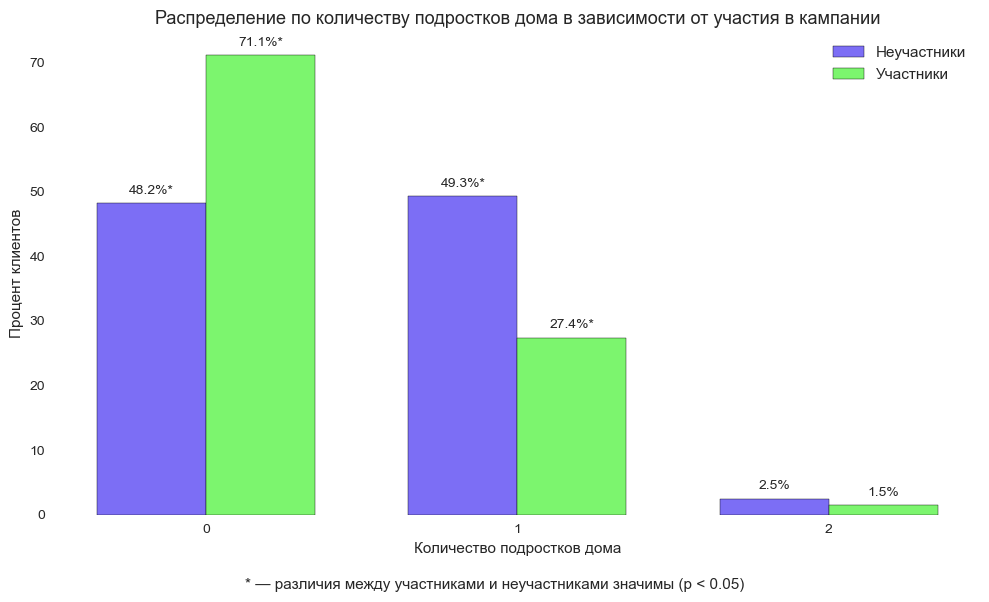


Общий χ²-тест по распределению Teenhome и Response: p-value = 0.00 — значимо

          Доля неучастников (%)  Доля участников (%)  p-value  Значимость
Teenhome                                                                 
0                          48.2                 71.1   0.0000     значимо
1                          49.3                 27.4   0.0000     значимо
2                           2.5                  1.5   0.2803  не значимо


In [130]:
grouped = (
    df
    .groupby(['Teenhome', 'Response'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)


chi2, p_all, _, _ = chi2_contingency(grouped)

total_non = grouped[0].sum()
total_yes = grouped[1].sum()

rows = []

for teenhome_val in grouped.index:
    count_non = grouped.loc[teenhome_val, 0]
    count_yes = grouped.loc[teenhome_val, 1]

    prop_non = count_non / total_non
    prop_yes = count_yes / total_yes

    count = [count_yes, count_non]
    nobs = [total_yes, total_non]
    z_stat, p_val = proportions_ztest(count, nobs)

    rows.append({
        'Teenhome': teenhome_val,
        'Доля неучастников (%)': round(prop_non * 100, 1),
        'Доля участников (%)': round(prop_yes * 100, 1),
        'p-value': round(p_val, 4),
        'Значимость': 'значимо' if p_val < 0.05 else 'не значимо',
        'signif': p_val < 0.05
    })


result_df = pd.DataFrame(rows).set_index('Teenhome')

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(result_df))

palette = {0: '#7C6EF5', 1: '#7CF56E'}

ax.bar([pos - bar_width/2 for pos in x], result_df['Доля неучастников (%)'], width=bar_width, color=palette[0], edgecolor='black', label='Неучастники')
ax.bar([pos + bar_width/2 for pos in x], result_df['Доля участников (%)'], width=bar_width, color=palette[1], edgecolor='black', label='Участники')


ax.set_xticks(x)
ax.set_xticklabels(result_df.index)
ax.set_ylabel('Процент клиентов')
ax.set_xlabel('Количество подростков дома')
ax.set_title('Распределение по количеству подростков дома в зависимости от участия в кампании', fontsize=13)
ax.legend(fontsize=11)
ax.set_facecolor('white')
sns.despine(left=True)
plt.grid(False)


for i, teenhome_val in enumerate(result_df.index):
    height_non = result_df.loc[teenhome_val, 'Доля неучастников (%)']
    height_yes = result_df.loc[teenhome_val, 'Доля участников (%)']
    signif = result_df.loc[teenhome_val, 'signif']
    star = '*' if signif else ''

    ax.text(i - bar_width/2, height_non + 1, f'{height_non:.1f}%{star}', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width/2, height_yes + 1, f'{height_yes:.1f}%{star}', ha='center', va='bottom', fontsize=10)

plt.figtext(0.5, 0.01, '* — различия между участниками и неучастниками значимы (p < 0.05)', ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()

print(f"\nОбщий χ²-тест по распределению Teenhome и Response: p-value = {p_all:.2f} — {'значимо' if p_all < 0.05 else 'незначимо'}\n")
print(result_df.drop(columns='signif'))


Участники кампании по сравнению с неучастниками чаще являются бездетными


#### Участие в прошлых кампаниях 

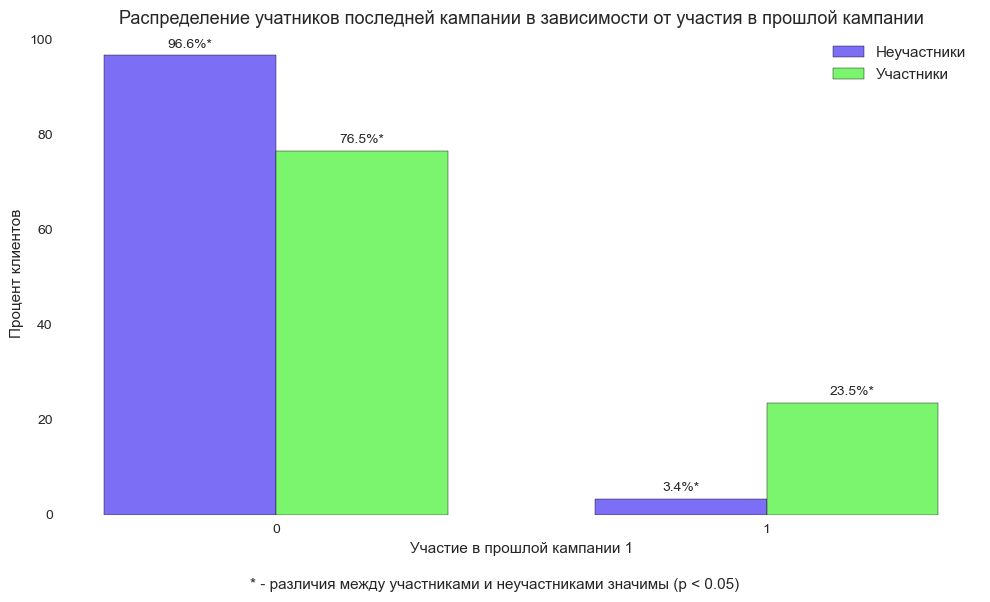


Общий χ²-тест по распределению AcceptedCmp1 и Response: p-value = 0.00 — значимо

              Доля неучастников (%)  Доля участников (%)  p-value Значимость
AcceptedCmp1                                                                
0                              96.6                 76.5      0.0    значимо
1                               3.4                 23.5      0.0    значимо


In [131]:
grouped = (
    df
    .groupby(['AcceptedCmp1', 'Response'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)


chi2, p_all, _, _ = chi2_contingency(grouped)


total_non = grouped[0].sum()
total_yes = grouped[1].sum()


rows = []

for AcceptedCmp1_val in grouped.index:
    count_non = grouped.loc[AcceptedCmp1_val, 0]
    count_yes = grouped.loc[AcceptedCmp1_val, 1]

    prop_non = count_non / total_non
    prop_yes = count_yes / total_yes

    count = [count_yes, count_non]
    nobs = [total_yes, total_non]
    z_stat, p_val = proportions_ztest(count, nobs)

    rows.append({
        'AcceptedCmp1': AcceptedCmp1_val,
        'Доля неучастников (%)': round(prop_non * 100, 1),
        'Доля участников (%)': round(prop_yes * 100, 1),
        'p-value': round(p_val, 4),
        'Значимость': 'значимо' if p_val < 0.05 else 'не значимо',
        'signif': p_val < 0.05
    })


result_df = pd.DataFrame(rows).set_index('AcceptedCmp1')


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(result_df))

palette = {0: '#7C6EF5', 1: '#7CF56E'}


ax.bar([pos - bar_width/2 for pos in x], result_df['Доля неучастников (%)'], width=bar_width, color=palette[0], edgecolor='black', label='Неучастники')
ax.bar([pos + bar_width/2 for pos in x], result_df['Доля участников (%)'], width=bar_width, color=palette[1], edgecolor='black', label='Участники')


ax.set_xticks(x)
ax.set_xticklabels(result_df.index)
ax.set_ylabel('Процент клиентов')
ax.set_xlabel('Участие в прошлой кампании 1')
ax.set_title('Распределение учатников последней кампании в зависимости от участия в прошлой кампании', fontsize=13)
ax.legend(fontsize=11)
ax.set_facecolor('white')
sns.despine(left=True)
plt.grid(False)


for i, kidhome_val in enumerate(result_df.index):
    height_non = result_df.loc[kidhome_val, 'Доля неучастников (%)']
    height_yes = result_df.loc[kidhome_val, 'Доля участников (%)']
    signif = result_df.loc[kidhome_val, 'signif']
    star = '*' if signif else ''

    ax.text(i - bar_width/2, height_non + 1, f'{height_non:.1f}%{star}', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width/2, height_yes + 1, f'{height_yes:.1f}%{star}', ha='center', va='bottom', fontsize=10)


plt.figtext(0.5, 0.01, '* - различия между участниками и неучастниками значимы (p < 0.05)', ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()


print(f"\nОбщий χ²-тест по распределению AcceptedCmp1 и Response: p-value = {p_all:.2f} — {'значимо' if p_all < 0.05 else 'незначимо'}\n")
print(result_df.drop(columns='signif'))


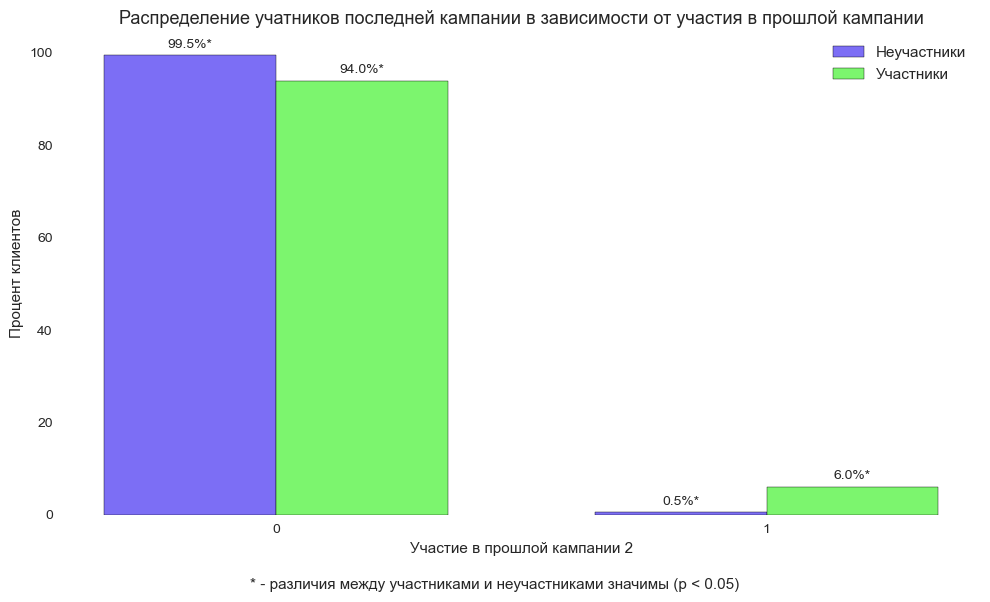


Общий χ²-тест по распределению AcceptedCmp2 и Response: p-value = 0.00 — значимо

              Доля неучастников (%)  Доля участников (%)  p-value Значимость
AcceptedCmp2                                                                
0                              99.5                 94.0      0.0    значимо
1                               0.5                  6.0      0.0    значимо


In [132]:
grouped = (
    df
    .groupby(['AcceptedCmp2', 'Response'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)


chi2, p_all, _, _ = chi2_contingency(grouped)


total_non = grouped[0].sum()
total_yes = grouped[1].sum()


rows = []

for AcceptedCmp2_val in grouped.index:
    count_non = grouped.loc[AcceptedCmp2_val, 0]
    count_yes = grouped.loc[AcceptedCmp2_val, 1]

    prop_non = count_non / total_non
    prop_yes = count_yes / total_yes

    count = [count_yes, count_non]
    nobs = [total_yes, total_non]
    z_stat, p_val = proportions_ztest(count, nobs)

    rows.append({
        'AcceptedCmp2': AcceptedCmp2_val,
        'Доля неучастников (%)': round(prop_non * 100, 1),
        'Доля участников (%)': round(prop_yes * 100, 1),
        'p-value': round(p_val, 4),
        'Значимость': 'значимо' if p_val < 0.05 else 'не значимо',
        'signif': p_val < 0.05
    })


result_df = pd.DataFrame(rows).set_index('AcceptedCmp2')


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(result_df))

palette = {0: '#7C6EF5', 1: '#7CF56E'}


ax.bar([pos - bar_width/2 for pos in x], result_df['Доля неучастников (%)'], width=bar_width, color=palette[0], edgecolor='black', label='Неучастники')
ax.bar([pos + bar_width/2 for pos in x], result_df['Доля участников (%)'], width=bar_width, color=palette[1], edgecolor='black', label='Участники')


ax.set_xticks(x)
ax.set_xticklabels(result_df.index)
ax.set_ylabel('Процент клиентов')
ax.set_xlabel('Участие в прошлой кампании 2')
ax.set_title('Распределение учатников последней кампании в зависимости от участия в прошлой кампании', fontsize=13)
ax.legend(fontsize=11)
ax.set_facecolor('white')
sns.despine(left=True)
plt.grid(False)


for i, kidhome_val in enumerate(result_df.index):
    height_non = result_df.loc[kidhome_val, 'Доля неучастников (%)']
    height_yes = result_df.loc[kidhome_val, 'Доля участников (%)']
    signif = result_df.loc[kidhome_val, 'signif']
    star = '*' if signif else ''

    ax.text(i - bar_width/2, height_non + 1, f'{height_non:.1f}%{star}', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width/2, height_yes + 1, f'{height_yes:.1f}%{star}', ha='center', va='bottom', fontsize=10)


plt.figtext(0.5, 0.01, '* - различия между участниками и неучастниками значимы (p < 0.05)', ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()


print(f"\nОбщий χ²-тест по распределению AcceptedCmp2 и Response: p-value = {p_all:.2f} — {'значимо' if p_all < 0.05 else 'незначимо'}\n")
print(result_df.drop(columns='signif'))


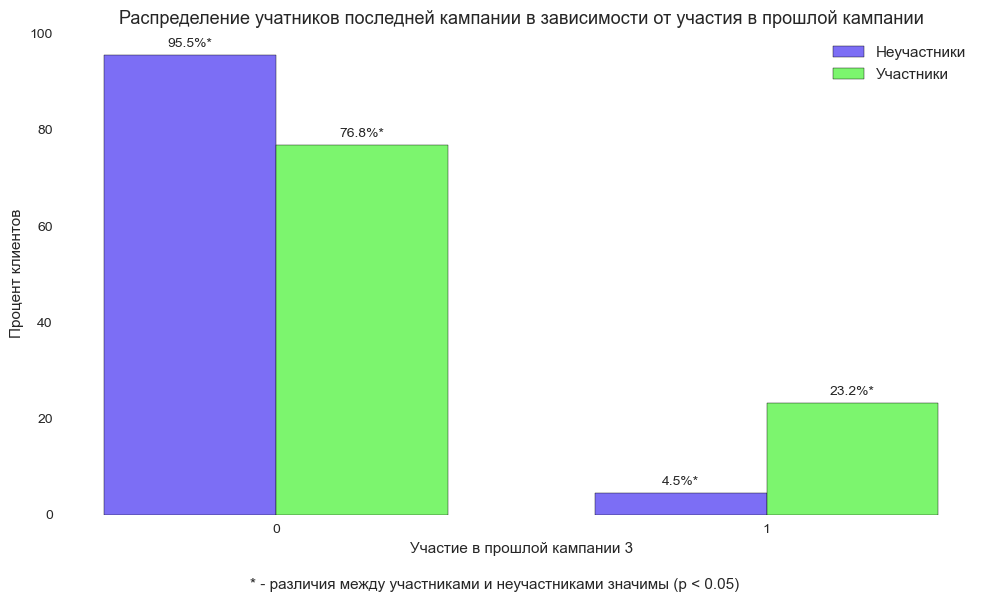


Общий χ²-тест по распределению AcceptedCmp3 и Response: p-value = 0.00 — значимо

              Доля неучастников (%)  Доля участников (%)  p-value Значимость
AcceptedCmp3                                                                
0                              95.5                 76.8      0.0    значимо
1                               4.5                 23.2      0.0    значимо


In [133]:
grouped = (
    df
    .groupby(['AcceptedCmp3', 'Response'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)


chi2, p_all, _, _ = chi2_contingency(grouped)


total_non = grouped[0].sum()
total_yes = grouped[1].sum()


rows = []

for AcceptedCmp3_val in grouped.index:
    count_non = grouped.loc[AcceptedCmp3_val, 0]
    count_yes = grouped.loc[AcceptedCmp3_val, 1]

    prop_non = count_non / total_non
    prop_yes = count_yes / total_yes

    count = [count_yes, count_non]
    nobs = [total_yes, total_non]
    z_stat, p_val = proportions_ztest(count, nobs)

    rows.append({
        'AcceptedCmp3': AcceptedCmp3_val,
        'Доля неучастников (%)': round(prop_non * 100, 1),
        'Доля участников (%)': round(prop_yes * 100, 1),
        'p-value': round(p_val, 4),
        'Значимость': 'значимо' if p_val < 0.05 else 'не значимо',
        'signif': p_val < 0.05
    })


result_df = pd.DataFrame(rows).set_index('AcceptedCmp3')


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(result_df))

palette = {0: '#7C6EF5', 1: '#7CF56E'}


ax.bar([pos - bar_width/2 for pos in x], result_df['Доля неучастников (%)'], width=bar_width, color=palette[0], edgecolor='black', label='Неучастники')
ax.bar([pos + bar_width/2 for pos in x], result_df['Доля участников (%)'], width=bar_width, color=palette[1], edgecolor='black', label='Участники')


ax.set_xticks(x)
ax.set_xticklabels(result_df.index)
ax.set_ylabel('Процент клиентов')
ax.set_xlabel('Участие в прошлой кампании 3')
ax.set_title('Распределение учатников последней кампании в зависимости от участия в прошлой кампании', fontsize=13)
ax.legend(fontsize=11)
ax.set_facecolor('white')
sns.despine(left=True)
plt.grid(False)


for i, kidhome_val in enumerate(result_df.index):
    height_non = result_df.loc[kidhome_val, 'Доля неучастников (%)']
    height_yes = result_df.loc[kidhome_val, 'Доля участников (%)']
    signif = result_df.loc[kidhome_val, 'signif']
    star = '*' if signif else ''

    ax.text(i - bar_width/2, height_non + 1, f'{height_non:.1f}%{star}', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width/2, height_yes + 1, f'{height_yes:.1f}%{star}', ha='center', va='bottom', fontsize=10)


plt.figtext(0.5, 0.01, '* - различия между участниками и неучастниками значимы (p < 0.05)', ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()


print(f"\nОбщий χ²-тест по распределению AcceptedCmp3 и Response: p-value = {p_all:.2f} — {'значимо' if p_all < 0.05 else 'незначимо'}\n")
print(result_df.drop(columns='signif'))


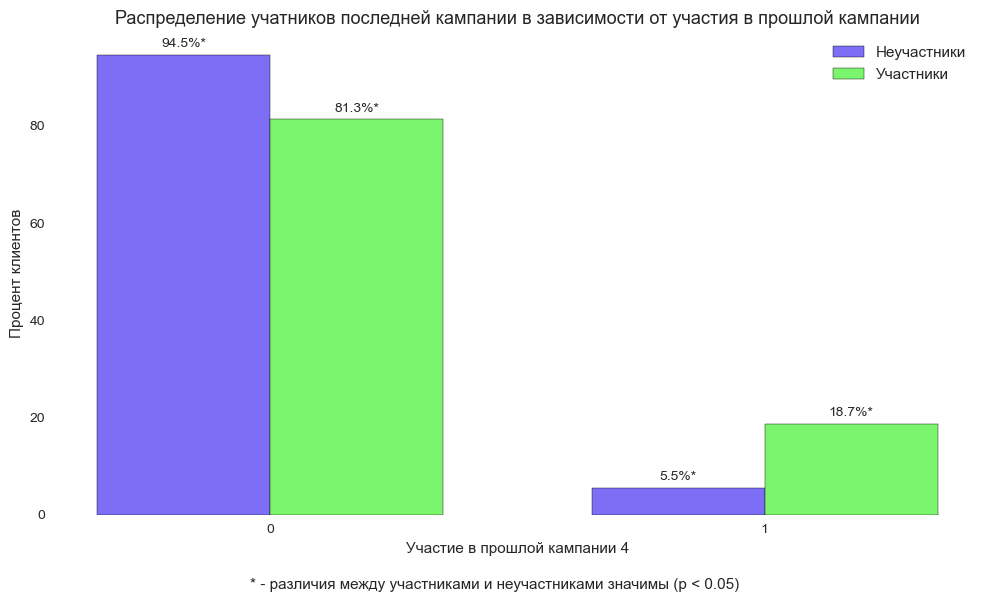


Общий χ²-тест по распределению AcceptedCmp3 и Response: p-value = 0.00 — значимо

              Доля неучастников (%)  Доля участников (%)  p-value Значимость
AcceptedCmp4                                                                
0                              94.5                 81.3      0.0    значимо
1                               5.5                 18.7      0.0    значимо


In [134]:
grouped = (
    df
    .groupby(['AcceptedCmp4', 'Response'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)


chi2, p_all, _, _ = chi2_contingency(grouped)


total_non = grouped[0].sum()
total_yes = grouped[1].sum()


rows = []

for AcceptedCmp4_val in grouped.index:
    count_non = grouped.loc[AcceptedCmp4_val, 0]
    count_yes = grouped.loc[AcceptedCmp4_val, 1]

    prop_non = count_non / total_non
    prop_yes = count_yes / total_yes

    count = [count_yes, count_non]
    nobs = [total_yes, total_non]
    z_stat, p_val = proportions_ztest(count, nobs)

    rows.append({
        'AcceptedCmp4': AcceptedCmp4_val,
        'Доля неучастников (%)': round(prop_non * 100, 1),
        'Доля участников (%)': round(prop_yes * 100, 1),
        'p-value': round(p_val, 4),
        'Значимость': 'значимо' if p_val < 0.05 else 'не значимо',
        'signif': p_val < 0.05
    })


result_df = pd.DataFrame(rows).set_index('AcceptedCmp4')


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(result_df))

palette = {0: '#7C6EF5', 1: '#7CF56E'}


ax.bar([pos - bar_width/2 for pos in x], result_df['Доля неучастников (%)'], width=bar_width, color=palette[0], edgecolor='black', label='Неучастники')
ax.bar([pos + bar_width/2 for pos in x], result_df['Доля участников (%)'], width=bar_width, color=palette[1], edgecolor='black', label='Участники')


ax.set_xticks(x)
ax.set_xticklabels(result_df.index)
ax.set_ylabel('Процент клиентов')
ax.set_xlabel('Участие в прошлой кампании 4')
ax.set_title('Распределение учатников последней кампании в зависимости от участия в прошлой кампании', fontsize=13)
ax.legend(fontsize=11)
ax.set_facecolor('white')
sns.despine(left=True)
plt.grid(False)


for i, kidhome_val in enumerate(result_df.index):
    height_non = result_df.loc[kidhome_val, 'Доля неучастников (%)']
    height_yes = result_df.loc[kidhome_val, 'Доля участников (%)']
    signif = result_df.loc[kidhome_val, 'signif']
    star = '*' if signif else ''

    ax.text(i - bar_width/2, height_non + 1, f'{height_non:.1f}%{star}', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width/2, height_yes + 1, f'{height_yes:.1f}%{star}', ha='center', va='bottom', fontsize=10)


plt.figtext(0.5, 0.01, '* - различия между участниками и неучастниками значимы (p < 0.05)', ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()


print(f"\nОбщий χ²-тест по распределению AcceptedCmp3 и Response: p-value = {p_all:.2f} — {'значимо' if p_all < 0.05 else 'незначимо'}\n")
print(result_df.drop(columns='signif'))


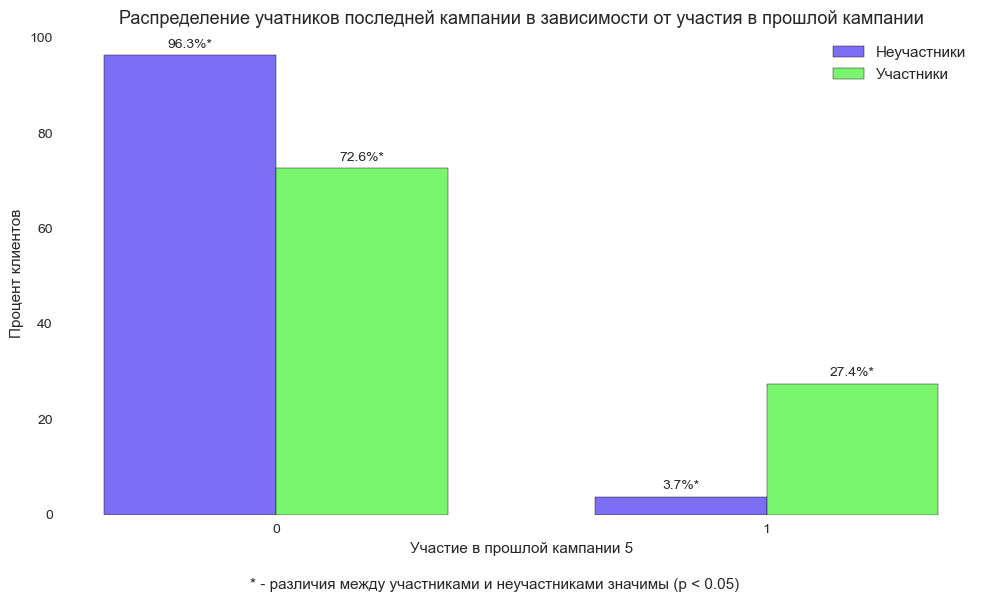


Общий χ²-тест по распределению AcceptedCmp3 и Response: p-value = 0.00 — значимо

              Доля неучастников (%)  Доля участников (%)  p-value Значимость
AcceptedCmp5                                                                
0                              96.3                 72.6      0.0    значимо
1                               3.7                 27.4      0.0    значимо


In [135]:
grouped = (
    df
    .groupby(['AcceptedCmp5', 'Response'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)


chi2, p_all, _, _ = chi2_contingency(grouped)


total_non = grouped[0].sum()
total_yes = grouped[1].sum()


rows = []

for AcceptedCmp5_val in grouped.index:
    count_non = grouped.loc[AcceptedCmp5_val, 0]
    count_yes = grouped.loc[AcceptedCmp5_val, 1]

    prop_non = count_non / total_non
    prop_yes = count_yes / total_yes

    count = [count_yes, count_non]
    nobs = [total_yes, total_non]
    z_stat, p_val = proportions_ztest(count, nobs)

    rows.append({
        'AcceptedCmp5': AcceptedCmp5_val,
        'Доля неучастников (%)': round(prop_non * 100, 1),
        'Доля участников (%)': round(prop_yes * 100, 1),
        'p-value': round(p_val, 4),
        'Значимость': 'значимо' if p_val < 0.05 else 'не значимо',
        'signif': p_val < 0.05
    })


result_df = pd.DataFrame(rows).set_index('AcceptedCmp5')


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(result_df))

palette = {0: '#7C6EF5', 1: '#7CF56E'}


ax.bar([pos - bar_width/2 for pos in x], result_df['Доля неучастников (%)'], width=bar_width, color=palette[0], edgecolor='black', label='Неучастники')
ax.bar([pos + bar_width/2 for pos in x], result_df['Доля участников (%)'], width=bar_width, color=palette[1], edgecolor='black', label='Участники')


ax.set_xticks(x)
ax.set_xticklabels(result_df.index)
ax.set_ylabel('Процент клиентов')
ax.set_xlabel('Участие в прошлой кампании 5')
ax.set_title('Распределение учатников последней кампании в зависимости от участия в прошлой кампании', fontsize=13)
ax.legend(fontsize=11)
ax.set_facecolor('white')
sns.despine(left=True)
plt.grid(False)


for i, kidhome_val in enumerate(result_df.index):
    height_non = result_df.loc[kidhome_val, 'Доля неучастников (%)']
    height_yes = result_df.loc[kidhome_val, 'Доля участников (%)']
    signif = result_df.loc[kidhome_val, 'signif']
    star = '*' if signif else ''

    ax.text(i - bar_width/2, height_non + 1, f'{height_non:.1f}%{star}', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width/2, height_yes + 1, f'{height_yes:.1f}%{star}', ha='center', va='bottom', fontsize=10)


plt.figtext(0.5, 0.01, '* - различия между участниками и неучастниками значимы (p < 0.05)', ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()


print(f"\nОбщий χ²-тест по распределению AcceptedCmp3 и Response: p-value = {p_all:.2f} — {'значимо' if p_all < 0.05 else 'незначимо'}\n")
print(result_df.drop(columns='signif'))


In [136]:
df["AcceptedCmp"] =  df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].apply(lambda row: 1 if row.sum() > 0 else 0, axis=1)

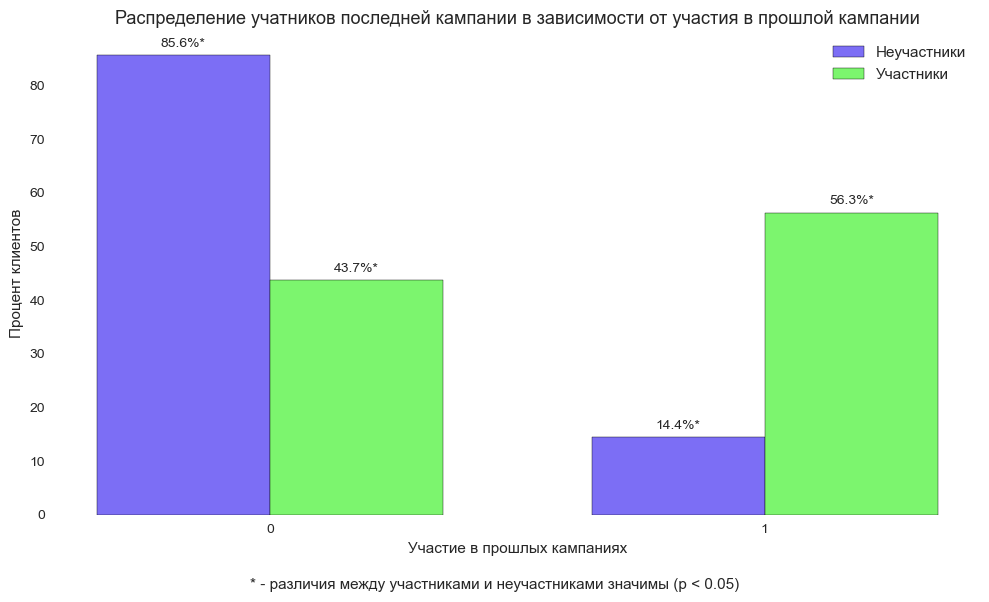


Общий χ²-тест по распределению AcceptedCmp и Response: p-value = 0.00 — значимо

             Доля неучастников (%)  Доля участников (%)  p-value Значимость
AcceptedCmp                                                                
0                             85.6                 43.7      0.0    значимо
1                             14.4                 56.3      0.0    значимо


In [137]:
grouped = (
    df
    .groupby(['AcceptedCmp', 'Response'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)


chi2, p_all, _, _ = chi2_contingency(grouped)


total_non = grouped[0].sum()
total_yes = grouped[1].sum()


rows = []

for AcceptedCmp_val in grouped.index:
    count_non = grouped.loc[AcceptedCmp_val, 0]
    count_yes = grouped.loc[AcceptedCmp_val, 1]

    prop_non = count_non / total_non
    prop_yes = count_yes / total_yes

    count = [count_yes, count_non]
    nobs = [total_yes, total_non]
    z_stat, p_val = proportions_ztest(count, nobs)

    rows.append({
        'AcceptedCmp': AcceptedCmp_val,
        'Доля неучастников (%)': round(prop_non * 100, 1),
        'Доля участников (%)': round(prop_yes * 100, 1),
        'p-value': round(p_val, 4),
        'Значимость': 'значимо' if p_val < 0.05 else 'не значимо',
        'signif': p_val < 0.05
    })


result_df = pd.DataFrame(rows).set_index('AcceptedCmp')


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(result_df))

palette = {0: '#7C6EF5', 1: '#7CF56E'}


ax.bar([pos - bar_width/2 for pos in x], result_df['Доля неучастников (%)'], width=bar_width, color=palette[0], edgecolor='black', label='Неучастники')
ax.bar([pos + bar_width/2 for pos in x], result_df['Доля участников (%)'], width=bar_width, color=palette[1], edgecolor='black', label='Участники')


ax.set_xticks(x)
ax.set_xticklabels(result_df.index)
ax.set_ylabel('Процент клиентов')
ax.set_xlabel('Участие в прошлых кампаниях')
ax.set_title('Распределение учатников последней кампании в зависимости от участия в прошлой кампании', fontsize=13)
ax.legend(fontsize=11)
ax.set_facecolor('white')
sns.despine(left=True)
plt.grid(False)


for i, kidhome_val in enumerate(result_df.index):
    height_non = result_df.loc[kidhome_val, 'Доля неучастников (%)']
    height_yes = result_df.loc[kidhome_val, 'Доля участников (%)']
    signif = result_df.loc[kidhome_val, 'signif']
    star = '*' if signif else ''

    ax.text(i - bar_width/2, height_non + 1, f'{height_non:.1f}%{star}', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width/2, height_yes + 1, f'{height_yes:.1f}%{star}', ha='center', va='bottom', fontsize=10)


plt.figtext(0.5, 0.01, '* - различия между участниками и неучастниками значимы (p < 0.05)', ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()


print(f"\nОбщий χ²-тест по распределению AcceptedCmp и Response: p-value = {p_all:.2f} — {'значимо' if p_all < 0.05 else 'незначимо'}\n")
print(result_df.drop(columns='signif'))


Участники последней кампании чаще участвовали в предыдущих кампаниях по сравнению с неучастниками: Доля участников прошлой кампании больше среди участников новой кампании, чем среди неучастников новой кампании

#### Жалобы

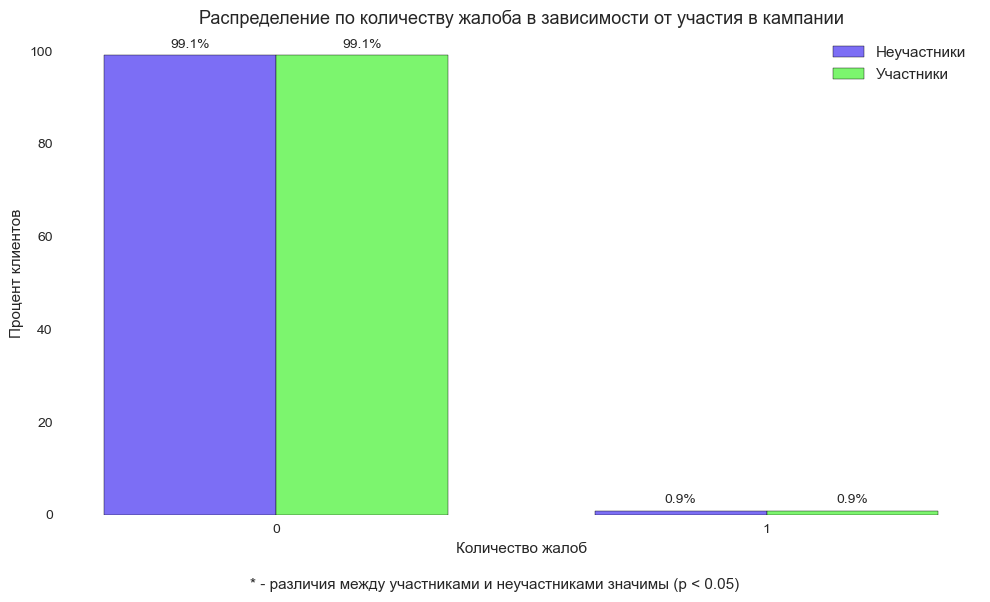


Общий χ²-тест по распределению Complain и Response: p-value = 1.0000 — незначимо

          Доля неучастников (%)  Доля участников (%)  p-value  Значимость
Complain                                                                 
0                          99.1                 99.1    0.988  не значимо
1                           0.9                  0.9    0.988  не значимо


In [138]:
grouped = (
    df
    .groupby(['Complain', 'Response'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)


chi2, p_all, _, _ = chi2_contingency(grouped)

total_non = grouped[0].sum()
total_yes = grouped[1].sum()


rows = []

for comp_val in grouped.index:
    count_non = grouped.loc[comp_val, 0]
    count_yes = grouped.loc[comp_val, 1]

    prop_non = count_non / total_non
    prop_yes = count_yes / total_yes

    count = [count_yes, count_non]
    nobs = [total_yes, total_non]
    z_stat, p_val = proportions_ztest(count, nobs)

    rows.append({
        'Complain': comp_val,
        'Доля неучастников (%)': round(prop_non * 100, 1),
        'Доля участников (%)': round(prop_yes * 100, 1),
        'p-value': round(p_val, 4),
        'Значимость': 'значимо' if p_val < 0.05 else 'не значимо',
        'signif': p_val < 0.05
    })

result_df = pd.DataFrame(rows).set_index('Complain')


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(result_df))

palette = {0: '#7C6EF5', 1: '#7CF56E'}

ax.bar([pos - bar_width/2 for pos in x], result_df['Доля неучастников (%)'], width=bar_width, color=palette[0], edgecolor='black', label='Неучастники')
ax.bar([pos + bar_width/2 for pos in x], result_df['Доля участников (%)'], width=bar_width, color=palette[1], edgecolor='black', label='Участники')


ax.set_xticks(x)
ax.set_xticklabels(result_df.index)
ax.set_ylabel('Процент клиентов')
ax.set_xlabel('Количество жалоб')
ax.set_title('Распределение по количеству жалоба в зависимости от участия в кампании', fontsize=13)
ax.legend(fontsize=11)
ax.set_facecolor('white')
sns.despine(left=True)
plt.grid(False)


for i, comp_val in enumerate(result_df.index):
    height_non = result_df.loc[comp_val, 'Доля неучастников (%)']
    height_yes = result_df.loc[comp_val, 'Доля участников (%)']
    signif = result_df.loc[comp_val, 'signif']
    star = '*' if signif else ''

    ax.text(i - bar_width/2, height_non + 1, f'{height_non:.1f}%{star}', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width/2, height_yes + 1, f'{height_yes:.1f}%{star}', ha='center', va='bottom', fontsize=10)


plt.figtext(0.5, 0.01, '* - различия между участниками и неучастниками значимы (p < 0.05)', ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()


print(f"\nОбщий χ²-тест по распределению Complain и Response: p-value = {p_all:.4f} — {'значимо' if p_all < 0.05 else 'незначимо'}\n")
print(result_df.drop(columns='signif'))


Нельзя сказать, что участники или неучастники более склонны подавать жалобы

#### Уровень образования

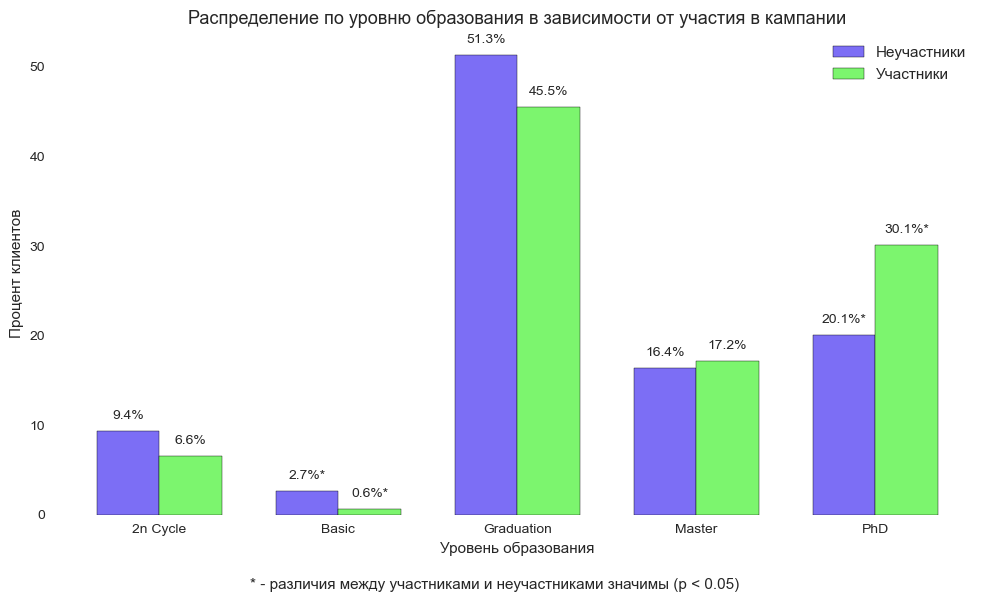


Общий χ²-тест по распределению Education и Response: p-value = 0.0001 — значимо

            Доля неучастников (%)  Доля участников (%)  p-value  Значимость
Education                                                                  
2n Cycle                      9.4                  6.6   0.1002  не значимо
Basic                         2.7                  0.6   0.0195     значимо
Graduation                   51.3                 45.5   0.0508  не значимо
Master                       16.4                 17.2   0.7381  не значимо
PhD                          20.1                 30.1   0.0000     значимо


In [139]:
grouped = (
    df
    .groupby(['Education', 'Response'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)


chi2, p_all, _, _ = chi2_contingency(grouped)


total_non = grouped[0].sum()
total_yes = grouped[1].sum()


rows = []

for edu_val in grouped.index:
    count_non = grouped.loc[edu_val, 0]
    count_yes = grouped.loc[edu_val, 1]

    prop_non = count_non / total_non
    prop_yes = count_yes / total_yes

    count = [count_yes, count_non]
    nobs = [total_yes, total_non]
    z_stat, p_val = proportions_ztest(count, nobs)

    rows.append({
        'Education': edu_val,
        'Доля неучастников (%)': round(prop_non * 100, 1),
        'Доля участников (%)': round(prop_yes * 100, 1),
        'p-value': round(p_val, 4),
        'Значимость': 'значимо' if p_val < 0.05 else 'не значимо',
        'signif': p_val < 0.05
    })


result_df = pd.DataFrame(rows).set_index('Education')


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(result_df))

palette = {0: '#7C6EF5', 1: '#7CF56E'}


ax.bar([pos - bar_width/2 for pos in x], result_df['Доля неучастников (%)'], width=bar_width, color=palette[0], edgecolor='black', label='Неучастники')
ax.bar([pos + bar_width/2 for pos in x], result_df['Доля участников (%)'], width=bar_width, color=palette[1], edgecolor='black', label='Участники')


ax.set_xticks(x)
ax.set_xticklabels(result_df.index)
ax.set_ylabel('Процент клиентов')
ax.set_xlabel('Уровень образования')
ax.set_title('Распределение по уровню образования в зависимости от участия в кампании', fontsize=13)
ax.legend(fontsize=11)
ax.set_facecolor('white')
sns.despine(left=True)
plt.grid(False)

for i, edu_val in enumerate(result_df.index):
    height_non = result_df.loc[edu_val, 'Доля неучастников (%)']
    height_yes = result_df.loc[edu_val, 'Доля участников (%)']
    signif = result_df.loc[edu_val, 'signif']
    star = '*' if signif else ''

    ax.text(i - bar_width/2, height_non + 1, f'{height_non:.1f}%{star}', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width/2, height_yes + 1, f'{height_yes:.1f}%{star}', ha='center', va='bottom', fontsize=10)


plt.figtext(0.5, 0.01, '* - различия между участниками и неучастниками значимы (p < 0.05)', ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()

print(f"\nОбщий χ²-тест по распределению Education и Response: p-value = {p_all:.4f} — {'значимо' if p_all < 0.05 else 'незначимо'}\n")
print(result_df.drop(columns='signif'))


Люди с PhD более склонны участвовать в кампании, а с уровнем образования Graduation - меньше

#### Семейное положение

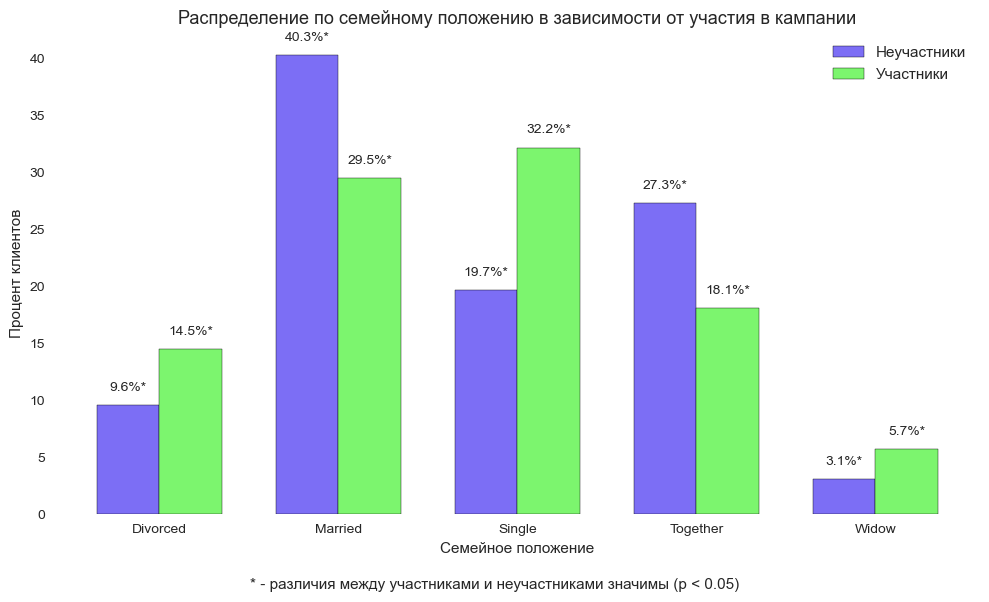


Общий χ²-тест по распределению Marital_Status и Response: p-value = 0.0000 — значимо

                Доля неучастников (%)  Доля участников (%)  p-value Значимость
Marital_Status                                                                
Divorced                          9.6                 14.5   0.0078    значимо
Married                          40.3                 29.5   0.0002    значимо
Single                           19.7                 32.2   0.0000    значимо
Together                         27.3                 18.1   0.0004    значимо
Widow                             3.1                  5.7   0.0140    значимо


In [140]:
grouped = (
    df
    .groupby(['Marital_Status', 'Response'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)


chi2, p_all, _, _ = chi2_contingency(grouped)


total_non = grouped[0].sum()
total_yes = grouped[1].sum()


rows = []

for mar_val in grouped.index:
    count_non = grouped.loc[mar_val, 0]
    count_yes = grouped.loc[mar_val, 1]

    prop_non = count_non / total_non
    prop_yes = count_yes / total_yes

    count = [count_yes, count_non]
    nobs = [total_yes, total_non]
    z_stat, p_val = proportions_ztest(count, nobs)

    rows.append({
        'Marital_Status': mar_val,
        'Доля неучастников (%)': round(prop_non * 100, 1),
        'Доля участников (%)': round(prop_yes * 100, 1),
        'p-value': round(p_val, 4),
        'Значимость': 'значимо' if p_val < 0.05 else 'не значимо',
        'signif': p_val < 0.05
    })


result_df = pd.DataFrame(rows).set_index('Marital_Status')


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(result_df))

palette = {0: '#7C6EF5', 1: '#7CF56E'}


ax.bar([pos - bar_width/2 for pos in x], result_df['Доля неучастников (%)'], width=bar_width, color=palette[0], edgecolor='black', label='Неучастники')
ax.bar([pos + bar_width/2 for pos in x], result_df['Доля участников (%)'], width=bar_width, color=palette[1], edgecolor='black', label='Участники')


ax.set_xticks(x)
ax.set_xticklabels(result_df.index)
ax.set_ylabel('Процент клиентов')
ax.set_xlabel('Семейное положение')
ax.set_title('Распределение по семейному положению в зависимости от участия в кампании', fontsize=13)
ax.legend(fontsize=11)
ax.set_facecolor('white')
sns.despine(left=True)
plt.grid(False)


for i, mar_val in enumerate(result_df.index):
    height_non = result_df.loc[mar_val, 'Доля неучастников (%)']
    height_yes = result_df.loc[mar_val, 'Доля участников (%)']
    signif = result_df.loc[mar_val, 'signif']
    star = '*' if signif else ''

    ax.text(i - bar_width/2, height_non + 1, f'{height_non:.1f}%{star}', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width/2, height_yes + 1, f'{height_yes:.1f}%{star}', ha='center', va='bottom', fontsize=10)


plt.figtext(0.5, 0.01, '* - различия между участниками и неучастниками значимы (p < 0.05)', ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()


print(f"\nОбщий χ²-тест по распределению Marital_Status и Response: p-value = {p_all:.4f} — {'значимо' if p_all < 0.05 else 'не значимо'}\n")
print(result_df.drop(columns='signif'))


Круговые диаграммы

Среди неучастников кампании больше женатыхили состоящих в отношениях, а одиноких, разведенных, вдов/вдовцов меньше

### Построим корреляционную матрицу

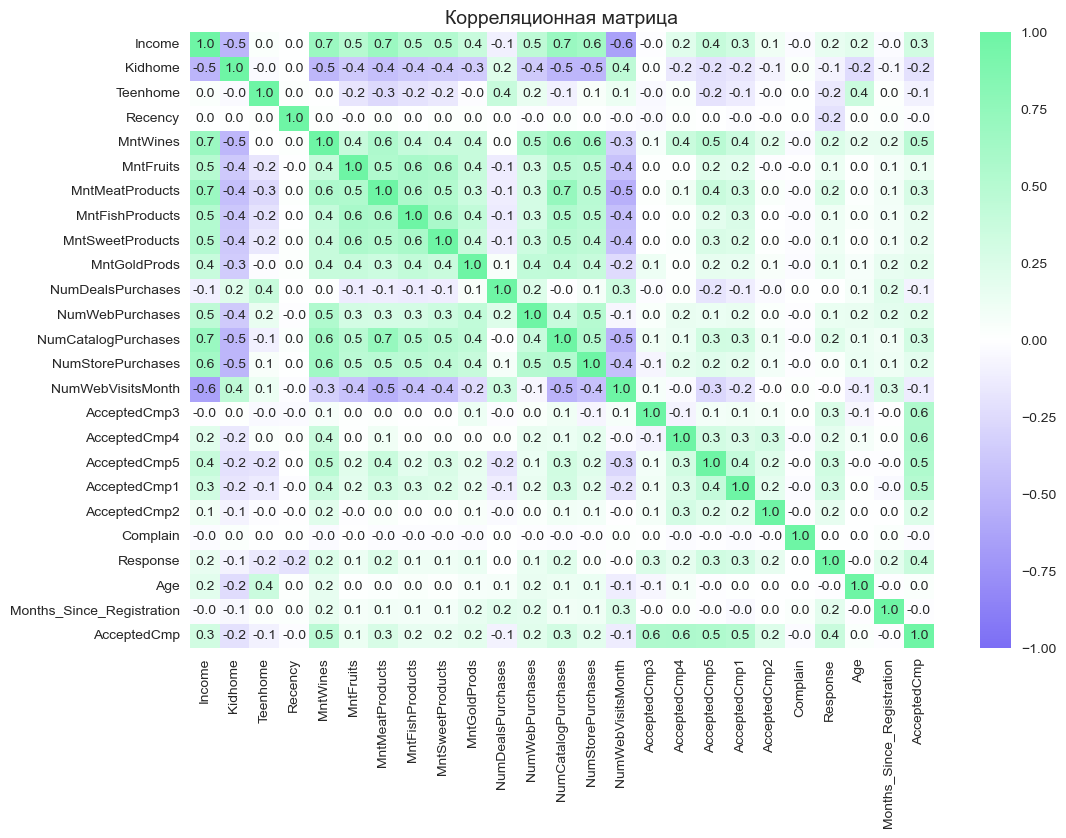

In [141]:
custom_cmap = LinearSegmentedColormap.from_list(
    "purple_white_green",
    ['#7C6EF5', 'white', '#6EF5A5']
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".1f",
    cmap=custom_cmap,
    linewidths=0,      
    linecolor='white',  
    vmin=-1,
    vmax=1,
    center=0
)

plt.title('Корреляционная матрица', fontname='Arial', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.grid(False)

plt.show()


Видим, что наши переменные мало скоррелированы с участием в последней кампании. Наиболее сильная корреляция (0.2-0.3) наблюдается между переменными, указывающими на участие в предыдущих кампаниях и последней кампании

## Преобразование переменных

Преобразуем категориальные переменные в набор бинарных переменных (для тренировочной и тестовой выборок):

In [142]:
Education_dummies = pd.get_dummies(df['Education'], prefix='Education', drop_first=True)
Marital_Status_dummies = pd.get_dummies(df['Marital_Status'], prefix='Marital_Status', drop_first=True)
df = pd.concat([df, Education_dummies, Marital_Status_dummies], axis=1)

Удалим ненужные переменные (из тренировочной и тестовой выборок)

In [143]:
df.drop(columns=["Dt_Customer", "Marital_Status", "Education", "Complain", "AcceptedCmp"], inplace=True)

## Гипотезы

- H1: Чем раньше клиент зарегистрировался на сайте магазина, тем большее его склонность попасть в категорию участников маркетинговой кампании
- H2: Если человек участвовал в прошлых маркетинговых кампаниях, склонность участвовать в следующей больше
- H3: Чем больше человек тратит на покупки по категориям, тем он более склонен участвовать в маркетинговых кампаниях
- H4: С ростом количества дней с момента последней покупки склонность попасть в категорию участников сокращается
- H5: Люди, совершающие большее число покупок через сайт, каталог и в магазине, а также регулярно посещяющие сайт магазина, более склонны участвовать в маркетинговых кампаниях

Более давний клиент, чаще совершающий покупки и больше тратящий, а также участвовавший в предыдущих маркетинговых кампаниях, скорее всего, более лоялен магазину, больше склонен участвовать в других маркетинговых кампаниях, в пользу чего свидетельствуют результаты предварительного анализа

- H6: Чем меньше детей в семье, тем больше склонность участвовать в маркетинговой кампании
- H7: Чем меньше подростков в семье, тем больше склонность частвовать в маркетинговой кампании
- H8: С ростом доходов склонность попасть в категорию участников кампании растет

Согласно результатам разведывательного анализа данных, данная маркетинговая кампания вызывает больший интерес у людей без детей, а также с более высоким уровнем дохода

# Обучение и тестирование моделей

Делим данные на тестовую и тренировочную выборки

In [144]:
X = df.drop(['Response'], axis=1)
y = df['Response']
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.2)

Шкалируем переменные

In [145]:
from sklearn.preprocessing import MinMaxScaler  


scaler = MinMaxScaler( )
scaler.fit(X_train) 

# (x - min)/(max - min)
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)

## Базовая модель

Запишем все наблюдения в самый многочисленный класс (у нас это 0, неучастники кампании):

In [146]:
from sklearn.metrics import f1_score
# Определение самого часто встречающегося класса в y_train
most_common_class = np.bincount(y_train).argmax()

# Создание baseline предсказаний для y_test
baseline_predictions = np.full_like(y_test, fill_value=most_common_class)

# Оценка точности baseline модели
accuracy = np.mean(baseline_predictions == y_test)
print(f'Accuracy baseline модели: {accuracy}')
f1_baseline = f1_score(y_test, baseline_predictions)
print(f'F1-мера для baseline модели: {f1_baseline}')

Accuracy baseline модели: 0.8501118568232662
F1-мера для baseline модели: 0.0


Посчитаем метрики качества модели:

In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_test, baseline_predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       380
           1       0.00      0.00      0.00        67

    accuracy                           0.85       447
   macro avg       0.43      0.50      0.46       447
weighted avg       0.72      0.85      0.78       447



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Если все наблюдения мы запишем в самый многочисленный класс - нулевой, то наша модель не будет предсказывать первый класс совсем (людей, которые принимали участие в кампании). Наша цель как раз состоит в предсказании участников кампании, поэтому мы будем опираться на f1-score для класса 1, соответственно, в нашем случае любая модель будет предсказывать первый класс лучше нулевой модели, которая его вообще не предсказывает. Кроме этого, можно учитывать accuracy и f1-score для класса 0 для сравнения моделей с базовой

## KNN класификация

Построим модедель с настройками по умолчанию

In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)
y_pred_knn = knn.predict(X_test_norm)
p_pred_knn = knn.predict_proba(X_test_norm) 
p_pred_knn = p_pred_knn[:, 1]  # P(y = 1 | X)


C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Посчитаем для нее метрики качества:

In [149]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       380
           1       0.60      0.27      0.37        67

    accuracy                           0.86       447
   macro avg       0.74      0.62      0.65       447
weighted avg       0.84      0.86      0.84       447



По f1-score для класса 0 данная модель не лучше базовой, для класса 1 - лучше базовой, но этот показатель крайне мал - составляет всего 0,37. Accuracy не значительно больше, чем в базовой модели

Попробобуем оптимизировать параметры для улучшения качества модели

In [150]:
accuracy_scores = []
f1_scores = []

for n in range(3, 16):
    # Создаем классификатор с текущим значением n_neighbors
    knn = KNeighborsClassifier(n_neighbors=n)
    
    # Обучаем модель и делаем прогнозы
    knn.fit(X_train_norm, y_train)
    y_pred_knn = knn.predict(X_test_norm)
    
    # Вычисляем точность и F1-меру
    accuracy = accuracy_score(y_test, y_pred_knn)
    f1 = f1_score(y_test, y_pred_knn)
    
    # Добавляем значения в списки
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    print(f"n_neighbors = {n}: Accuracy = {accuracy}, F1 = {f1}")

# Выводим лучшее значение метрик
best_accuracy_idx = np.argmax(accuracy_scores)
best_f1_idx = np.argmax(f1_scores)

print(f"\nЛучший результат точности: n_neighbors = {best_accuracy_idx + 3}, Accuracy = {accuracy_scores[best_accuracy_idx]}")
print(f"Лучший результат F1-меры: n_neighbors = {best_f1_idx + 3}, F1 = {f1_scores[best_f1_idx]}")


n_neighbors = 3: Accuracy = 0.8657718120805369, F1 = 0.4339622641509434


C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

n_neighbors = 4: Accuracy = 0.87248322147651, F1 = 0.3595505617977528
n_neighbors = 5: Accuracy = 0.8635346756152126, F1 = 0.3711340206185567


C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

n_neighbors = 6: Accuracy = 0.8657718120805369, F1 = 0.3181818181818181
n_neighbors = 7: Accuracy = 0.8680089485458613, F1 = 0.3370786516853933
n_neighbors = 8: Accuracy = 0.8612975391498882, F1 = 0.2619047619047619


C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

n_neighbors = 9: Accuracy = 0.8657718120805369, F1 = 0.3023255813953488
n_neighbors = 10: Accuracy = 0.8635346756152126, F1 = 0.26506024096385544
n_neighbors = 11: Accuracy = 0.8657718120805369, F1 = 0.3023255813953488
n_neighbors = 12: Accuracy = 0.8680089485458613, F1 = 0.3058823529411765
n_neighbors = 13: Accuracy = 0.8702460850111857, F1 = 0.3255813953488372
n_neighbors = 14: Accuracy = 0.8702460850111857, F1 = 0.29268292682926833


C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

n_neighbors = 15: Accuracy = 0.87248322147651, F1 = 0.3132530120481928

Лучший результат точности: n_neighbors = 4, Accuracy = 0.87248322147651
Лучший результат F1-меры: n_neighbors = 3, F1 = 0.4339622641509434


C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Оптимальный результат - 3 соседа. Оценим данную модель

In [151]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_norm, y_train)
y_pred_knn = knn.predict(X_test_norm)
p_pred_knn = knn.predict_proba(X_test_norm) 
p_pred_knn = p_pred_knn[:, 1]  # P(y = 1 | X)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Получим метрики качества этой модели

In [152]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       380
           1       0.59      0.34      0.43        67

    accuracy                           0.87       447
   macro avg       0.74      0.65      0.68       447
weighted avg       0.85      0.87      0.85       447



Данная модель лучше, чем модель с характеристиками по умолчанию, но f1-score для класса 1 все равно маленькая (0,43). По другим показателям (accuracy, f1-score для класса 0) данная модель не лучше нулевой модели 

## Логистическая регрессия

Для начала оценим логистическую модель с характеристиками по умолчанию

In [153]:
from sklearn import linear_model #линейные модели
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(
    random_state=1, #генератор случайных чисел
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_norm, y_train)

LogisticRegression(random_state=1)

Выведем метрики качества для обучающей и тестовой выборок:

In [154]:
from sklearn import metrics #метрики
#Делаем предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train_norm)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_norm)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1519
           1       0.75      0.45      0.57       265

    accuracy                           0.90      1784
   macro avg       0.83      0.71      0.75      1784
weighted avg       0.89      0.90      0.89      1784

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       380
           1       0.71      0.43      0.54        67

    accuracy                           0.89       447
   macro avg       0.81      0.70      0.74       447
weighted avg       0.88      0.89      0.88       447



Видим, что по accuracy и f1-score модель лучше базовой и knn, по f1-score для  класса 1, модель лучше, чем knn (0,54 против 0,43), но снова показатель нельзя назвать очень хорошим

Попробуем изменить порог отсечения для улучшения качества классификации

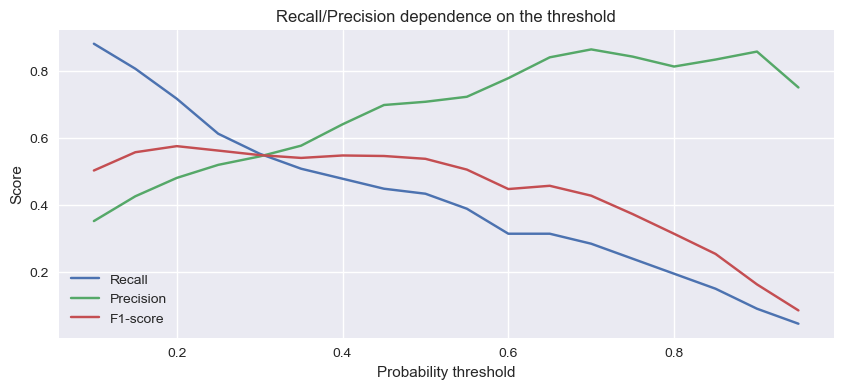

In [155]:
#Нас интересует только вероятность класса (второй столбец)
y_test_proba_pred = log_reg.predict_proba(X_test_norm)[:, 1]
#Для удобства завернем numpy-массив в pandas Series
y_test_proba_pred = pd.Series(y_test_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #В противном случае - к классу 0
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')

#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
#Даем графику название и подписи осям
ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.legend();

Находим значение оптимального порога

In [156]:
max_f1_index = np.argmax(f1_scores)
# Найдем значение threshold для этой точки
optimal_threshold = thresholds[max_f1_index]

print("Optimal Threshold value:", optimal_threshold)

Optimal Threshold value: 0.20000000000000004


Получаем метрики качества модели с учетом этого порога 

In [157]:
#Задаем оптимальный порог отсеченяи
threshold_opt = optimal_threshold
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       380
           1       0.48      0.72      0.57        67

    accuracy                           0.84       447
   macro avg       0.71      0.79      0.74       447
weighted avg       0.88      0.84      0.85       447



accuracy и f1-score  для класса 0 снизились, но они не хуже, чем в базовой модели. f1-score для класса 1 выросла до 0,57, что лучше, чем во всех моделях, которые были раньше, но такой показатель тоже не идеал, хотя для настолько несбалансированных классов неплохо

Попробуем найти оптимальные параметры

In [158]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'penalty': ['l2', 'none'] , # тип регуляризации
              'solver': ['lbfgs', 'sag'], # алгоритм оптимизации
               'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}, # уровень силы регуляризации
              
              {'penalty': ['l1', 'l2'] ,
              'solver': ['liblinear', 'saga'],
               'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}
]
grid_search_1 = GridSearchCV(
    estimator=linear_model.LogisticRegression(random_state=1, max_iter=1000), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_1.fit(X_train_norm, y_train) 
print("accuracy на тестовом наборе: {:.2f}".format(grid_search_1.score(X_test_norm, y_test)))
y_test_pred = grid_search_1.predict(X_test_norm)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_1.best_params_))

Wall time: 11.6 s
accuracy на тестовом наборе: 0.89
f1_score на тестовом наборе: 0.54
Наилучшие значения гиперпараметров: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


Строим модель по оптимальным параметрам

In [159]:
from sklearn import linear_model #линейные модели
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(
    C = 1, #сила регулязации
    penalty = 'l1', #указывает тип регуляризации. L1-регуляризация использует механизм регуляризации L1 (Lasso)
    solver = 'liblinear', #метод оптимизации
    random_state=1, #генератор случайных чисел
    max_iter=1000 #количество итераций до сходимости
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_norm, y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=1,
                   solver='liblinear')

Получаем метрики качества классификации (для тестовой и обучающей выборок)

In [160]:
from sklearn import metrics #метрики
#Делаем предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train_norm)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_norm)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1519
           1       0.76      0.47      0.58       265

    accuracy                           0.90      1784
   macro avg       0.84      0.72      0.76      1784
weighted avg       0.89      0.90      0.89      1784

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       380
           1       0.70      0.42      0.52        67

    accuracy                           0.89       447
   macro avg       0.80      0.69      0.73       447
weighted avg       0.87      0.89      0.87       447



Качество не сильно улучшилось: accuracy и f-score для класса 0 стали выше, но при этом f-score для класса 1 уменьшилась

Попробуем выбрать оптимальный порог отсечения для данной модели

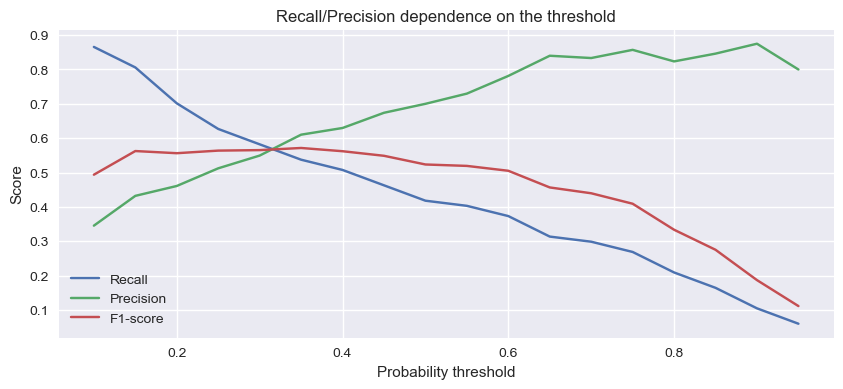

In [161]:
#Нас интересует только вероятность класса (второй столбец)
y_test_proba_pred = log_reg.predict_proba(X_test_norm)[:, 1]
#Для удобства завернем numpy-массив в pandas Series
y_test_proba_pred = pd.Series(y_test_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #В противном случае - к классу 0
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')

#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
#Даем графику название и подписи осям
ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.legend();

Считаем порог

In [162]:
max_f1_index = np.argmax(f1_scores)
# Найдем значение threshold для этой точки
optimal_threshold = thresholds[max_f1_index]

print("Optimal Threshold value:", optimal_threshold)

Optimal Threshold value: 0.3500000000000001


Получаем метрики для тестовой выборки с учетом оптимального порога отсечения

In [163]:
#Задаем оптимальный порог вероятностей
threshold_opt = optimal_threshold
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       380
           1       0.61      0.54      0.57        67

    accuracy                           0.88       447
   macro avg       0.77      0.74      0.75       447
weighted avg       0.87      0.88      0.88       447



Вывод: Качество двух моделей с разными параметрами (по умолчанию и оптимальными), но оптимальным для каждой порогом отсечения одинаковое (f1-score для класса 1 равно 0,57). Модели предсказывает участников кампании лучше базовой модели, однако качество моделей не идеальное, но для настолько несбалансированных классов качество неплохое

## Проверим гипотезы

Получаем названия всех зависимых переменных

In [164]:
columns_order = X_train.columns.tolist()
print(columns_order)

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Age', 'Months_Since_Registration', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow']


Получаем оценки для всех зависимых переменных

In [165]:
print("Коэффициенты модели:")
coefficients = log_reg.coef_
for coef, feat in zip(coefficients[0], X_train.columns):
    print(f"{feat}: {coef}")

# Вывод константы (intercept)
print("Константа (intercept):", log_reg.intercept_[0])

Коэффициенты модели:
Income: 0.0
Kidhome: 0.0
Teenhome: -1.7955864129365764
Recency: -2.9357469772450493
MntWines: 0.0
MntFruits: 0.80029250593159
MntMeatProducts: 2.005650738322048
MntFishProducts: 0.0
MntSweetProducts: -0.23593562960088973
MntGoldProds: 0.02605499626154339
NumDealsPurchases: 1.6763257245132748
NumWebPurchases: 1.1721014319384933
NumCatalogPurchases: 0.5043035999563618
NumStorePurchases: -2.3214983719209195
NumWebVisitsMonth: 0.4545931181472133
AcceptedCmp3: 2.0315705979420935
AcceptedCmp4: 1.0711251441999634
AcceptedCmp5: 1.7530573171578188
AcceptedCmp1: 1.5794948812631635
AcceptedCmp2: 1.3503881517817815
Age: 0.33656729828886184
Months_Since_Registration: 3.13212740006474
Education_Basic: -1.065105329819156
Education_Graduation: 0.0
Education_Master: 0.3628177585147013
Education_PhD: 0.9495890895224333
Marital_Status_Married: -1.1384511923402532
Marital_Status_Single: 0.0
Marital_Status_Together: -1.1934734865428798
Marital_Status_Widow: 0.09050527683890812
Констант

**Подтвердившиеся гипотезы**: 


H1: Чем раньше клиент зарегистрировался на сайте магазина, тем большее его склонность попасть в категорию участников маркетинговой кампании

H2: Если человек участвовал в прошлых маркетинговых кампаниях, склонность участвовать в следующей больше

- участие в кампаниях 1-5 положительно связано с участием в последней кампании

H4: С ростом количества дней с момента последней покупки склонность попасть в категорию участников сокращается

- покупатели, совершающие покупки чаще, боле склонны участвовать в маркетинговой кампании


H5: Люди, совершающие большее число покупок через сайт, каталог и в магазине, а также регулярно посещающие сайт магазина, более склонны участвовать в маркетинговых кампаниях 

- онлайн покупки и покупки по каталогу положительно связаны с участием в маркетинговой кампании, а покупки в магазине - отрицательно
- посещение сайта положительно связано с участием в маркетинговой кампании

H7: Чем меньше подростков в семье, тем больше склонность участвовать в кампании 

- наличие подростков отрицательно связано со склонностью участвовать в маркетинговой кампании


**Частично подтвердившиеся гипотезы**:  

H3: Чем больше человек тратит на покупки по категориям, тем он более склонен участвовать в маркетинговой кампании

- люди, которые больше тратят на покупку мяса, фруктов, золота в большей степени склонны участвовать в маркетинговой кампании однако те, кто тратит больше денег на сладости менее склонны участвовать в ней 
- покупки вина и рыбы не связаны с участием в маркетинговой кампании


**Неподтвердившиеся гипотезы**:

H6: Чем меньше детей в семье, тем больше склонность участвовать в кампании

- наличие детей не связано со склонностью участвовать в маркетинговой кампании

H8: С ростом доходов склонность попасть в категорию участников кампании растет
- уровень дохода не имеет статистически значимой связи со склонностью к участию в промо-акциях
    

## Случайный лес

Построим модель с параметрами по умолчанию

In [166]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier()
#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train)
print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.99
Test: 0.44


In [167]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.69      0.33      0.44        67

    accuracy                           0.88       447
   macro avg       0.79      0.65      0.69       447
weighted avg       0.86      0.88      0.86       447



f1-score для класса 1 хуже, чем в прошлых моделях, по accuracy и f1-score данная модель лучше нулевой

Найдем оптимальные параметры:

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble, metrics

# Задаем сетку параметров, которые мы хотим перебрать
param_grid = {
    'n_estimators': [100, 300, 500], #количество деревьев в лесу
    'max_depth': [10, 15, 20], # максимальная глубина каждого дерева
    'criterion': ['gini', 'entropy'], #критерий для разделения узлов дерева
    'min_samples_leaf': [5, 10, 15] #минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться
}

# Создаем объект GridSearchCV с моделью случайного леса и сеткой параметров
grid_search = GridSearchCV(estimator=ensemble.RandomForestClassifier(random_state=42, class_weight='balanced'),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3,
                           n_jobs=-1)

# Выполняем поиск лучших параметров
grid_search.fit(X_train, y_train)


# Выводим лучшие параметры и значение метрики
print("Лучшие параметры:", grid_search.best_params_)
print('Train: {:.2f}'.format(grid_search.best_score_))

# Получаем предсказания с лучшей моделью и выводим значение метрики на тестовой выборке
best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test)
print('Лучший результат на тестовой выборке (f1 score): {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))


Лучшие параметры: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 500}
Train: 0.62
Лучший результат на тестовой выборке (f1 score): 0.51


Строим модель с оптимальными параметрами

In [169]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(
    class_weight='balanced',
    max_depth=15,
    random_state=42,
    criterion = 'entropy', 
    min_samples_leaf = 15,
    n_estimators = 500
)
#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train)
print('Train (f1 score): {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test)
print('Test (f1 score): {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train (f1 score): 0.74
Test (f1 score): 0.57


Получаем метрики качества классификации для тренировочной и тестовой выборок

In [170]:
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1519
           1       0.61      0.94      0.74       265

    accuracy                           0.90      1784
   macro avg       0.80      0.92      0.84      1784
weighted avg       0.93      0.90      0.91      1784



In [171]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       380
           1       0.49      0.67      0.57        67

    accuracy                           0.85       447
   macro avg       0.71      0.77      0.74       447
weighted avg       0.87      0.85      0.86       447



- В модели присутствует переобучение (f1-score на тестовой выборке (равно 0,73) больше, чем на тренировочной (равно 0.57))
- Модель не лучше, чем базовая модель (f1-score для класса 1, конечно, больше, но f1-score для класса 0 и accuracy не больше чем в базовой модели)
- Модель по f1-score для класса 1 не отличается от логистической модели (но в логистической accuracy и f1-score для класса 0 больше)
- Все же f1-score (0,57) не очень высокий результат, но для несбалансированных классов, можно считать этот результат удовлетворительнымч

## CatBoostClassifier

Обучим модель без дополнительных параметров

In [172]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(random_state=26)
model.fit(X_train_norm, y_train)
preds_class = model.predict(X_test_norm)
metrics.f1_score(preds_class, y_test)

Learning rate set to 0.013191
0:	learn: 0.6822112	total: 12.2ms	remaining: 12.2s
1:	learn: 0.6726261	total: 15.1ms	remaining: 7.53s
2:	learn: 0.6631604	total: 18.2ms	remaining: 6.04s
3:	learn: 0.6531213	total: 21.2ms	remaining: 5.28s
4:	learn: 0.6438470	total: 24.6ms	remaining: 4.9s
5:	learn: 0.6339515	total: 27.7ms	remaining: 4.59s
6:	learn: 0.6235319	total: 30.8ms	remaining: 4.37s
7:	learn: 0.6122033	total: 33.8ms	remaining: 4.19s
8:	learn: 0.6017626	total: 36.7ms	remaining: 4.04s
9:	learn: 0.5926682	total: 39.8ms	remaining: 3.94s
10:	learn: 0.5837719	total: 43ms	remaining: 3.87s
11:	learn: 0.5751789	total: 46.4ms	remaining: 3.82s
12:	learn: 0.5674852	total: 49.7ms	remaining: 3.77s
13:	learn: 0.5616978	total: 52.1ms	remaining: 3.67s
14:	learn: 0.5539226	total: 55.5ms	remaining: 3.64s
15:	learn: 0.5474946	total: 58.9ms	remaining: 3.62s
16:	learn: 0.5405979	total: 62.5ms	remaining: 3.61s
17:	learn: 0.5340202	total: 66.1ms	remaining: 3.6s
18:	learn: 0.5286455	total: 69.8ms	remaining: 3.

0.5555555555555556

In [173]:
print(metrics.classification_report(preds_class, y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       406
           1       0.45      0.73      0.56        41

    accuracy                           0.89       447
   macro avg       0.71      0.82      0.75       447
weighted avg       0.92      0.89      0.90       447



Видим, что по f1-score для класса 1, модель не лучше предыдущих

Посчитаем важность категорий

- получим названия предикторов

In [174]:
# Преобразуем объекты Series в DataFrame
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

# Объединяем X_train_df и y_train_df по столбцам
combined_data = pd.concat([X_train_df, y_train_df], axis=1)

- отсортируем предикторы по важности

In [175]:
pd.DataFrame(
    {
        "feature_importance": model.get_feature_importance(),
        "feature_names": combined_data.drop(columns="Response").columns,
    }
).sort_values(by=["feature_importance"], ascending=False)

,feature_importance,feature_names
3,14.483952,Recency
21,11.202772,Months_Since_Registration
13,6.443005,NumStorePurchases
0,5.837600,Income
6,5.167313,MntMeatProducts
9,4.521867,MntGoldProds
2,4.132903,Teenhome
12,3.757291,NumCatalogPurchases
15,3.674810,AcceptedCmp3
14,3.583964,NumWebVisitsMonth


Видим, что самые важные признаки, покупателей, для определения их участия в маркетинговой кампании: дата последней покупки и дата регистрации на сайте, количество покупок в магазине, затраты на покупку мяса, уровень дохода (последнее противоречит незначимости этого фактора в логистической регрессионной модели)

# Выводы

- Максимальная f1-score для класса 1 (участников кампании) - 0,6. Результат средний, однако с учётом несбалансированности классов он приемлем
- по совокупности метрик и в сравнении с базовой моделью наилучший результат показала логистическая регрессия с параметрами C=1, max_iter=1000, penalty='l1', solver='liblinear' и порогом отсечения 0,3

## Лучшая модель: 

In [176]:
from sklearn import linear_model #линейные модели
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(
    C = 1, 
    penalty = 'l1',
    solver = 'liblinear',
    random_state=1, #генератор случайных чисел
    max_iter=1000 #количество итераций до сходимости
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_norm, y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=1,
                   solver='liblinear')

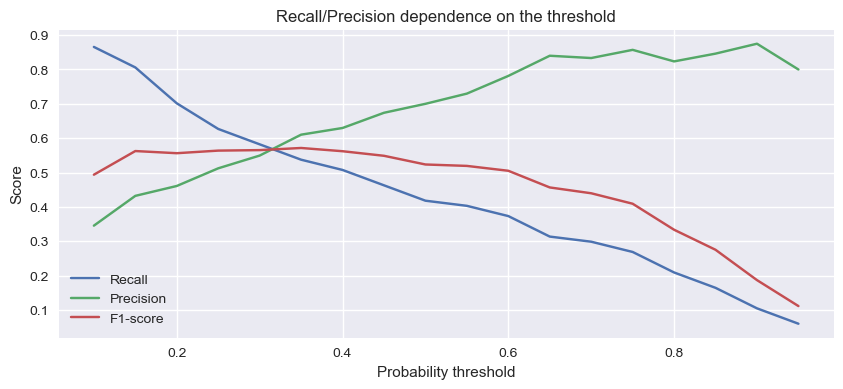

In [177]:
#Нас интересует только вероятность класса (второй столбец)
y_test_proba_pred = log_reg.predict_proba(X_test_norm)[:, 1]
#Для удобства завернем numpy-массив в pandas Series
y_test_proba_pred = pd.Series(y_test_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #В противном случае - к классу 0
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')

#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
#Даем графику название и подписи осям
ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.legend();

In [178]:
max_f1_index = np.argmax(f1_scores)
# Найдем значение threshold для этой точки
optimal_threshold = thresholds[max_f1_index]

print("Optimal Threshold value:", optimal_threshold)

Optimal Threshold value: 0.3500000000000001


Метрики качества для лучшей модели:

In [179]:
#Задаем оптимальный порог вероятностей
threshold_opt = optimal_threshold
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       380
           1       0.61      0.54      0.57        67

    accuracy                           0.88       447
   macro avg       0.77      0.74      0.75       447
weighted avg       0.87      0.88      0.88       447



## Результаты

Можно сделать вывод, что покупатели, которые чаще совершают покупки, больше тратят, чаще покупают по скидкам, участвовали в прошлых маркетинговых кампаниях, а также которые чаще покупают онлайн и посещают сайт, чаще участвуют в новых маркетинговых кампаниях

При этом самые важные признаки, позволяющие определить учатсвует ли клиент в маркетинговых кампаняих: дата последней покупки и дата регистрации на сайте, количество покупок в магазине, траты на покупку мяса